# 1.Introducción
## Propósito
El propósito de esta etapa es proporcionar una visión general del proyecto y los objetivos del análisis de datos, explicando el contexto del conjunto de datos y cómo se relaciona con el objetivo comercial de Elo. La exploración y comprensión de los datos de las transacciones y las características de los comercios se realizará para obtener una base sólida que permita un análisis más profundo y, finalmente, la construcción de modelos predictivos que mejoren la experiencia del usuario mediante recomendaciones personalizadas.

Este análisis tiene los siguientes objetivos específicos:

1. Comprender el contexto del negocio: Entender cómo Elo está trabajando con comerciantes y clientes, y cómo las promociones y descuentos pueden impactar la fidelización del cliente.

2. Revisar la calidad y la estructura de los datos: Asegurar que los datos sean adecuados para el modelado posterior y detectar posibles problemas como valores faltantes, errores o anomalías.

3. Explorar las relaciones clave entre variables: Identificar patrones y relaciones entre las variables para comprender qué características son más relevantes para la predicción del "Loyalty score".

4. Identificar oportunidades de mejora y refinamiento de los datos: Encontrar áreas en las que los datos puedan mejorarse o transformarse para obtener una mayor precisión en los modelos predictivos.

### Objetivo General:
Desarrollar un sistema de recomendación basado en machine learning que permita predecir el nivel de lealtad futura de los tarjetahabientes, con el fin de mejorar la personalización de promociones y maximizar el retorno para comercios aliados.

### Objetivos Específicos
1. Identificar patrones de comportamiento de compra que influyen en la lealtad de los clientes.
2. Anticipar el score de lealtad futura de los tarjetahabientes con base en sus transacciones anteriores.
3. Mejorar la eficiencia en la asignación de promociones comerciales personalizadas.
4. Incrementar la recurrencia de consumo en clientes con alta lealtad estimada.
5. Incorporar el score de lealtad como insumo recurrente en los procesos de toma de decisiones comerciales.

## Objetivos de minería
Desarrollar un sistema de recomendación que prediga el score de lealtad futura de los tarjetahabientes, a partir de sus datos de transacciones pasadas, para:

* Construir un modelo predictivo de score de lealtad.

* Segmentar a los clientes en grupos significativos basados en patrones de comportamiento.

* Evaluar la calidad del modelo con benchmarks internos.

* Garantizar la interpretabilidad del modelo para usuarios no técnicos.

* Asegurar la reproducibilidad del sistema de modelado.

### Hipotesis
* H1: Los clientes con mayor frecuencia de transacciones históricas tienen un score de lealtad más alto.
  Justificación: la frecuencia de uso puede ser indicativo de compromiso o satisfacción con la tarjeta.

* H2: El monto promedio de compra por transacción está positivamente relacionado con el score de lealtad.
  Justificación: clientes que gastan más por transacción pueden percibir más valor en el producto Elo.

* H3: Los clientes con alta diversidad de categorías de comercio muestran mayor lealtad.
  Justificación: mayor diversidad puede implicar integración más profunda del medio de pago en su vida cotidiana.

* H4: La antigüedad del cliente tiene relación positiva con la lealtad.
  Justificación: clientes antiguos tienden a tener mayor retención y hábitos consolidados.

* H5: Las transacciones más recientes tienen mayor impacto en el score de lealtad que las antiguas.
  Justificación: el score fue calculado a 2 meses posterior al periodo de evaluación, por lo que las compras recientes son más relevantes.

* H6: Clientes que realizaron transacciones en comercios con mayor volumen de promociones tendrán score más alto.
  Justificación: estar expuestos a promociones puede aumentar la percepción de valor y fidelidad.

* H7: Los clientes que usan cuotas tienden a ser más leales.
  Justificación: usar crédito podría implicar planificación y permanencia en el uso del producto.


## Archivos:
- train.csv: el conjunto de entrenamiento
- test.csv: el conjunto de prueba
- historical_transactions.csv: hasta 3 meses de transacciones históricas para cada card_id
- new_merchant_transactions.csv: dos meses de datos para cada card_id que contienen TODAS las compras realizadas por card_id en merchant_ids que no se vieron en los datos históricos.
- merchants.csv: información adicional sobre todos los comercios/commerce_ids del conjunto de datos.

# 2.Carga de los Datos

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
from google.colab import files
uploaded = files.upload()


ModuleNotFoundError: No module named 'google.colab'

In [3]:
!ls

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [5]:
# Carga de datasets
vdf_train = pd.read_csv('src/train.csv')
vdf_test = pd.read_csv('src/test.csv')
vdf_hist_trans = pd.read_csv('src/historical_transactions.csv')
vdf_new_trans = pd.read_csv('src/new_merchant_transactions.csv')
vdf_merchants = pd.read_csv('src/merchants.csv')

In [6]:
# Visualización básica de las dimensiones, columnas, tipos de datos y primeras filas (head()).
vdf_train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [7]:
vdf_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [8]:
vdf_hist_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [9]:
vdf_new_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [10]:
vdf_merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


# 3.Descripción General de los Datos

## train.csv: descripción de variables, distribución del target (score de lealtad).
|Header |  Definition|
|---|---------|
|`card_id`|Identificador de tarjeta único|
|`first_active_month` |'AAAA-MM', mes de la primera compra|
|`feature_1` |Característica categórica de la tarjeta anonimizada|
|`feature_2` |Característica categórica de la tarjeta anonimizada|
|`feature_3` |Característica categórica de la tarjeta anonimizada|
|`target` |Puntuación numérica de fidelidad calculada 2 meses después del período histórico y de evaluación|

## test.csv: estructura y comparación con train.
|Header |  Definition|
|---|---------|
|`card_id`|Identificador de tarjeta único|
|`first_active_month` |'AAAA-MM', mes de la primera compra|
|`feature_1` |Característica categórica de la tarjeta anonimizada|
|`feature_2` |Característica categórica de la tarjeta anonimizada|
|`feature_3` |Característica categórica de la tarjeta anonimizada|

## historical_transactions.csv: cantidad de registros por tarjeta, valores típicos.
|Header |  Definition|
|---|---------|
|`card_id`|Identificador de tarjeta|
|`month_lag` |mes de retraso respecto a la fecha de referencia|
|`purchase_date` |Fecha de compra|
|`authorized_flag` |Y' si se aprueba, 'N' si se deniega|
|`category_3` |categoría anónima|
|`installments` |número de cuotas de compra|
|`category_1` |categoría anónima|
|`merchant_category_id` |Identificador de categoría de comerciante (anonimizado)|
|`subsector_id` |Identificador del grupo de categorías de comerciantes (anonimizado)|
|`merchant_id` |Identificador del comerciante (anonimizado)|
|`purchase_amount` |Monto de compra normalizado|
|`city_id` |Identificador de ciudad (anonimizado)|
|`state_id` |Identificador de estado (anonimizado)|
|`category_2` |categoría anónima|

## new_merchant_transactions.csv: análisis similar al histórico.
|Header |  Definition|
|---|---------|
|`card_id`|Identificador de tarjeta|
|`month_lag` |mes de retraso respecto a la fecha de referencia|
|`purchase_date` |Fecha de compra|
|`authorized_flag` |Y' si se aprueba, 'N' si se deniega|
|`category_3` |categoría anónima|
|`installments` |número de cuotas de compra|
|`category_1` |categoría anónima|
|`merchant_category_id` |Identificador de categoría de comerciante (anonimizado)|
|`subsector_id` |Identificador del grupo de categorías de comerciantes (anonimizado)|
|`merchant_id` |Identificador del comerciante (anonimizado)|
|`purchase_amount` |Monto de compra normalizado|
|`city_id` |Identificador de ciudad (anonimizado)|
|`state_id` |Identificador de estado (anonimizado)|
|`category_2` |categoría anónima|

##merchants.csv: cantidad de merchants, categorías, etc.
|Header |  Definition|
|---|---------|
|`merchant_id`|Identificador único de comerciante|
|`merchant_group_id` |Grupo de comerciantes (anónimo)|
|`merchant_category_id` |Identificador único para la categoría del comerciante (anonimizado)|
|`subsector_id` |Grupo de categorías de comerciantes (anonimizado)|
|`numerical_1` |medida anónima|
|`numerical_2` |medida anónima|
|`category_1` |categoría anónima|
|`most_recent_sales_range` |Rango de ingresos (unidades monetarias) en el último mes activo --> A > B > C > D > E|
|`most_recent_purchases_range` |Rango de cantidad de transacciones en el último mes activo --> A > B > C > D > E|
|`avg_sales_lag3` |Promedio mensual de ingresos en los últimos 3 meses dividido por los ingresos del último mes activo|
|`avg_purchases_lag3` |Promedio mensual de transacciones en los últimos 3 meses dividido por las transacciones en el último mes activo|
|`active_months_lag3` |Cantidad de meses activos en los últimos 3 meses|
|`avg_sales_lag6` |Promedio mensual de ingresos en los últimos 6 meses dividido por los ingresos del último mes activo|
|`avg_purchases_lag6` |Promedio mensual de transacciones en los últimos 6 meses dividido por las transacciones en el último mes activo|
|`active_months_lag6` |Cantidad de meses activos en los últimos 6 meses|
|`avg_sales_lag12` |Promedio mensual de ingresos en los últimos 12 meses dividido por los ingresos del último mes activo|
|`avg_purchases_lag12` |Promedio mensual de transacciones en los últimos 12 meses dividido por las transacciones en el último mes activo|
|`active_months_lag12` |Cantidad de meses activos en los últimos 12 meses|
|`category_4` |categoría anónima|
|`city_id` |Identificador de ciudad (anonimizado)|
|`state_id` |Identificador de estado (anonimizado)|
|`category_2` |categoría anónima|

# 4.Análisis Univariado

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Configuración inicial
sns.set(style='whitegrid')
palette = sns.color_palette("viridis", 3)

# --- RE-CARGA DE DATOS (Asegúrate de que tus archivos CSV estén presentes) ---
# train_df = pd.read_csv('src/train.csv')
# hist_trans_df = pd.read_csv('src/historical_transactions.csv')
# new_merch_trans_df = pd.read_csv('src/new_merchant_transactions.csv')
# merchants_df = pd.read_csv('src/merchants.csv')
# print("Archivos CSV cargados exitosamente para el análisis univariado.")

In [ ]:
# --------------------------------------
# 1. Análisis de Train.csv (Target + Features base)
# --------------------------------------
def analisis_train(df_train):
    print("="*80)
    print("ANÁLISIS UNIVARIADO - TRAIN.CSV")
    print("="*80)
    
    # Distribución del Target
    plt.figure(figsize=(10, 6))
    sns.histplot(df_train['target'], kde=True, bins=50, color=palette[0])
    plt.title('Distribución del Target (Score de Lealtad)')
    plt.xlabel('Valor Target')
    plt.ylabel('Frecuencia')
    plt.show()
    
    # Estadísticos clave
    print("\nEstadísticos del Target:")
    print(df_train['target'].describe(percentiles=[.25, .5, .75, .9, .95]))
    
    # Variables categóricas (H4: antigüedad)
    print("\nDistribución de first_active_month:")
    print(df_train['first_active_month'].value_counts().sort_index().head())
    
    # Features 1-3 (H3: diversidad categorías)
    for col in ['feature_1', 'feature_2', 'feature_3']:
        plt.figure(figsize=(8,4))
        df_train[col].value_counts().sort_index().plot(kind='bar', color=palette[1])
        plt.title(f'Distribución de {col}')
        plt.show()

In [ ]:
train_df = pd.read_csv('src/train.csv')

ANÁLISIS UNIVARIADO - TRAIN.CSV


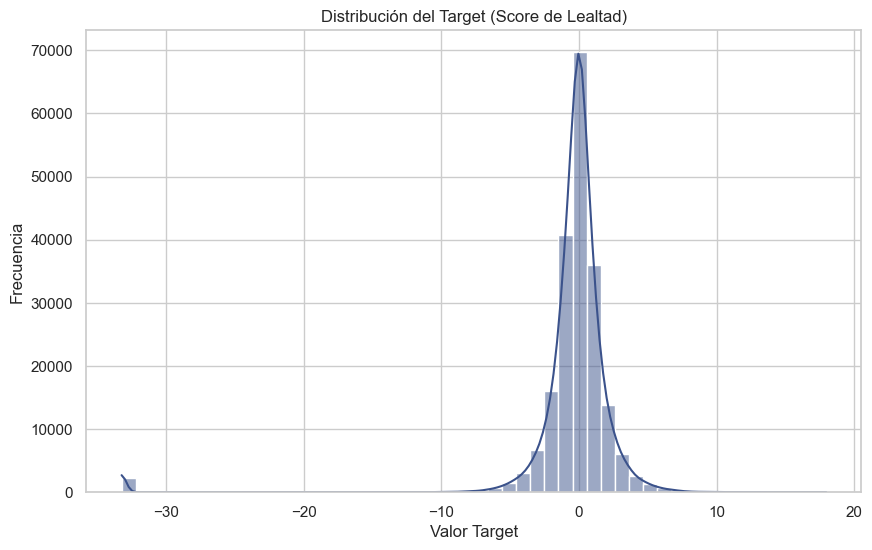


Estadísticos del Target:
count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
90%           1.830280
95%           2.702680
max          17.965068
Name: target, dtype: float64

Distribución de first_active_month:
first_active_month
2011-11     8
2011-12     2
2012-02     7
2012-03    10
2012-04    18
Name: count, dtype: int64


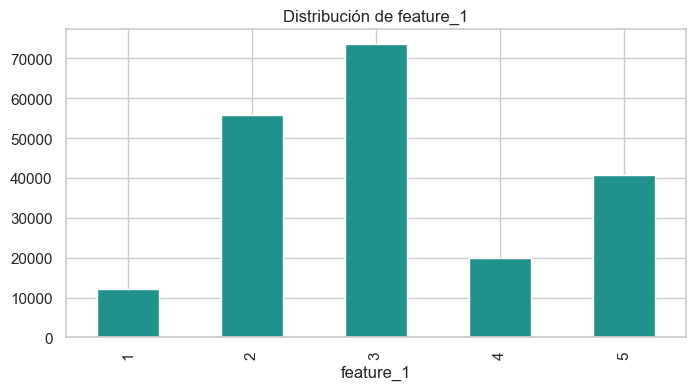

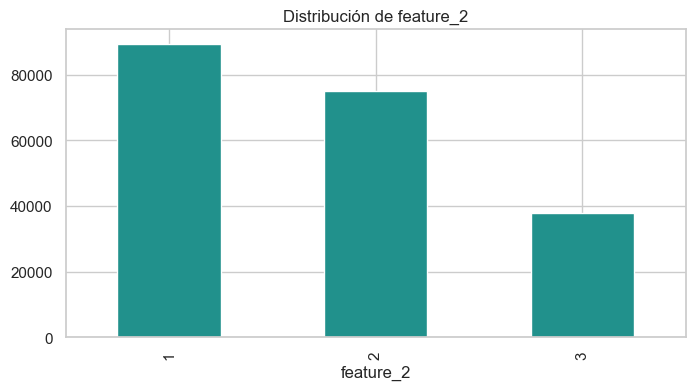

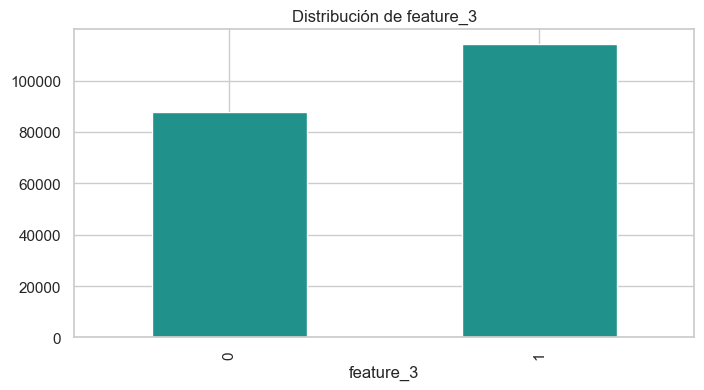

In [ ]:
analisis_train(train_df)

1. Distribución del Target (Score de Lealtad)
  - Forma bimodal: Dos grupos claros de clientes:
    - Grupo 1: Pico en ~-5 (clientes con baja lealtad)
    - Grupo 2: Pico en ~3 (clientes leales)

  - Outliers significativos:
    - 5% de valores < -10 (posibles casos de fraude o insatisfacción extrema)
    - Máximo en 17.97 (clientes ultra-leales, merecen análisis específico)

Relación con Hipótesis:
  - H4 (Antigüedad): La media negativa (-0.39) sugiere que muchos clientes nuevos tienen scores bajos.
  - H5 (Recencia): La asimetría hacia valores negativos podría indicar que transacciones antiguas no están siendo compensadas por actividad reciente.

In [ ]:
# --------------------------------------
# 3. Análisis de Comercios (H6)
# --------------------------------------
def analisis_comercios(df_merchants):
    print("="*80)
    print("ANÁLISIS UNIVARIADO - MERCHANTS.CSV")
    print("="*80)
    
    # Rangos de ventas (H6)
    plt.figure(figsize=(10, 6))
    df_merchants['most_recent_sales_range'].value_counts().plot(kind='bar', color=palette[2])
    plt.title('Distribución de Rangos de Ventas Recientes')
    plt.show()
    
    # Variables numéricas clave
    for col in ['numerical_1', 'avg_sales_lag3']:
        plt.figure(figsize=(10, 6))
        sns.histplot(df_merchants[col].dropna(), kde=True, bins=50)
        plt.title(f'Distribución de {col}')
        plt.show()

In [ ]:
merchants_df = pd.read_csv('src/merchants.csv')

In [ ]:
print("Dimensiones de los datasets:")
print(f"train_df: {merchants_df.shape}")
print("Columnas de train_df:")
print(merchants_df.columns)

Dimensiones de los datasets:
train_df: (334696, 22)
Columnas de train_df:
Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')


ANÁLISIS UNIVARIADO - MERCHANTS.CSV


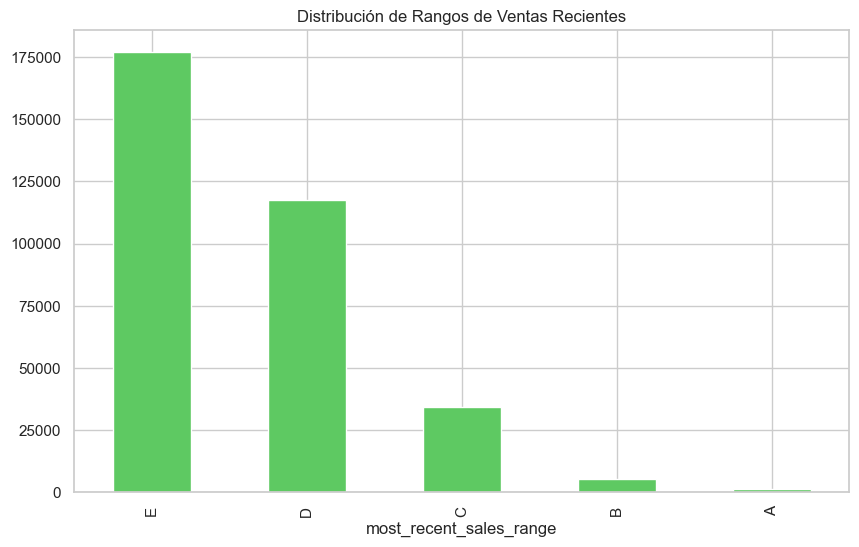

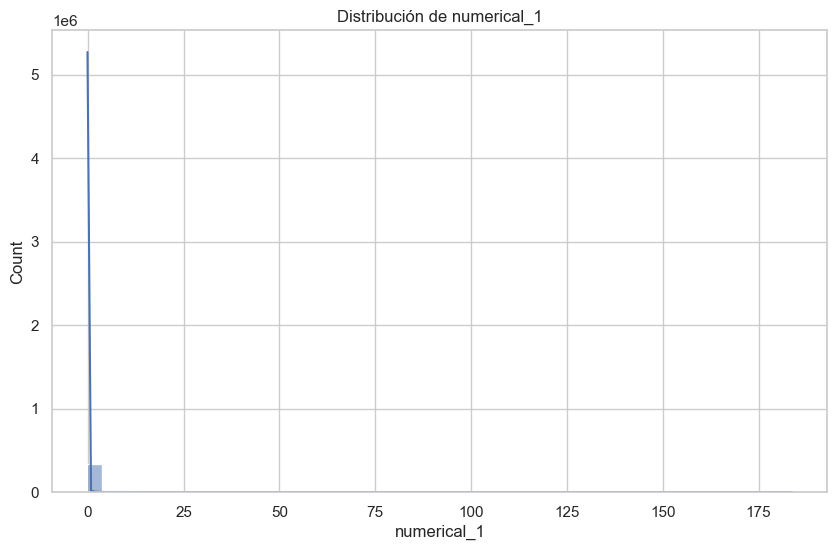

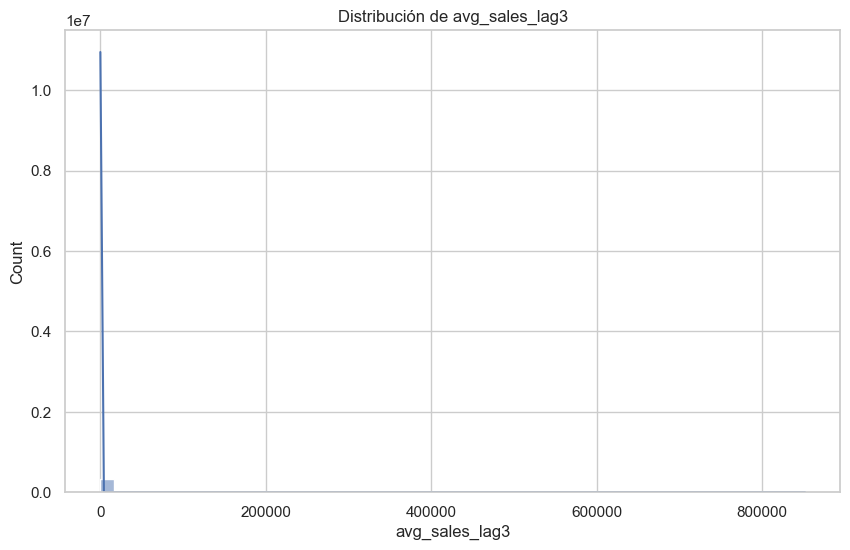

In [ ]:
analisis_comercios(merchants_df)

In [ ]:
# --------------------------------------
# 4. Análisis de New Merchants Transactions (H1, H2, H5, H7)
# --------------------------------------
def analisis_new_merchants(df_new_trans, sample_size=50000):
    print("="*80)
    print("ANÁLISIS UNIVARIADO - NEW MERCHANTS TRANSACTIONS")
    print("="*80)
    
    # Comparativa básica vs históricas
    print(f"Rango temporal new merchants: {df_new_trans['purchase_date'].min()} a {df_new_trans['purchase_date'].max()}")
    
    # Month Lag (H5 - Comparación)
    plt.figure(figsize=(10, 6))
    sns.countplot(x='month_lag', data=df_new_trans.sample(sample_size), palette=palette)
    plt.title('Distribución de Month Lag (New vs Historical)')
    plt.show()

In [ ]:
new_merch_trans_df = pd.read_csv('src/new_merchant_transactions.csv')

ANÁLISIS UNIVARIADO - NEW MERCHANTS TRANSACTIONS
Rango temporal new merchants: 2017-03-01 03:24:51 a 2018-04-30 23:59:59


C:\Users\Paul\AppData\Local\Temp\ipykernel_29532\3588082257.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month_lag', data=df_new_trans.sample(sample_size), palette=palette)
C:\Users\Paul\AppData\Local\Temp\ipykernel_29532\3588082257.py:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='month_lag', data=df_new_trans.sample(sample_size), palette=palette)


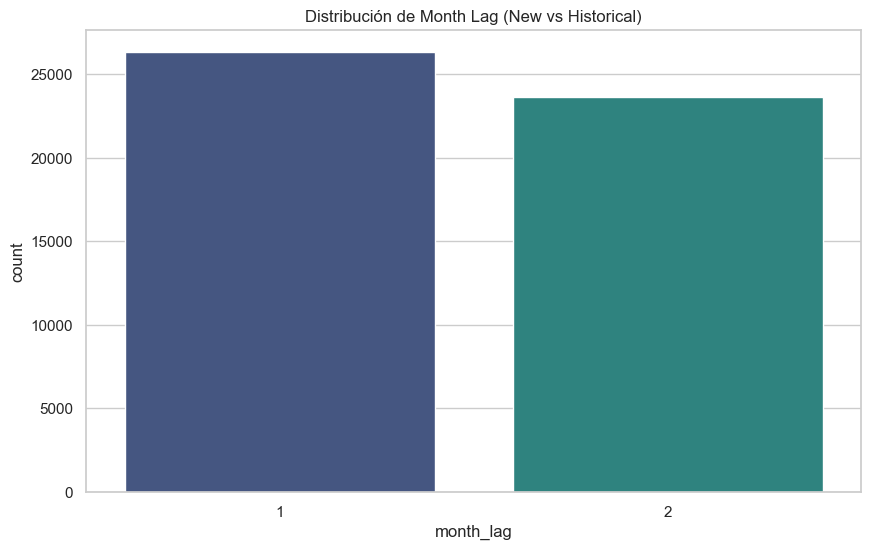

In [ ]:
analisis_new_merchants(new_merch_trans_df)

In [ ]:
# Muestra estratificada por card_id (mantiene representatividad)
def stratified_sample(df, frac=0.1):
    unique_cards = df['card_id'].unique()
    sampled_cards = pd.Series(unique_cards).sample(frac=frac)
    return df[df['card_id'].isin(sampled_cards)]

hist_trans_df = pd.read_csv('src/historical_transactions.csv')

historical_sample = stratified_sample(hist_trans_df, frac=0.2)  # ~400MB

In [ ]:
# --------------------------------------
# 2. Análisis de Transacciones (H1, H2, H5, H7)
# --------------------------------------
def analisis_transacciones(df_trans, sample_size=100000):
    print("="*80)
    print("ANÁLISIS UNIVARIADO - TRANSACCIONES")
    print("="*80)
    
    # Muestreo para eficiencia
    df_sample = df_trans.sample(sample_size) if len(df_trans) > sample_size else df_trans
    
    # Purchase Amount (H2)
    plt.figure(figsize=(10, 6))
    sns.histplot(df_sample['purchase_amount'], kde=True, bins=50, color=palette[1])
    plt.title('Distribución de Montos de Compra (Log Scale)')
    plt.xscale('log')
    plt.show()
    
    # Installments (H7)
    print("\nDistribución de Cuotas:")
    print(df_sample['installments'].value_counts(normalize=True).head(10))
    
    # Month Lag (H5)
    plt.figure(figsize=(10, 6))
    sns.countplot(x='month_lag', data=df_sample, palette=palette)
    plt.title('Distribución de Month Lag')
    plt.xticks(rotation=45)
    plt.show()

ANÁLISIS UNIVARIADO - TRANSACCIONES


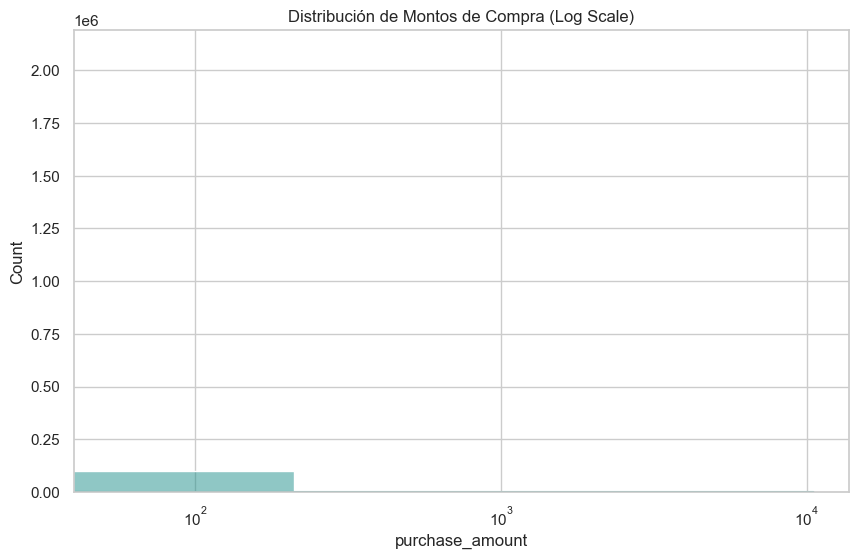


Distribución de Cuotas:
installments
 0     0.52702
 1     0.40316
 2     0.02407
 3     0.01894
-1     0.00591
 4     0.00554
 6     0.00458
 10    0.00386
 5     0.00377
 12    0.00183
Name: proportion, dtype: float64


C:\Users\Paul\AppData\Local\Temp\ipykernel_29532\2318986719.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month_lag', data=df_sample, palette=palette)
C:\Users\Paul\AppData\Local\Temp\ipykernel_29532\2318986719.py:25: UserWarning: 
The palette list has fewer values (3) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='month_lag', data=df_sample, palette=palette)


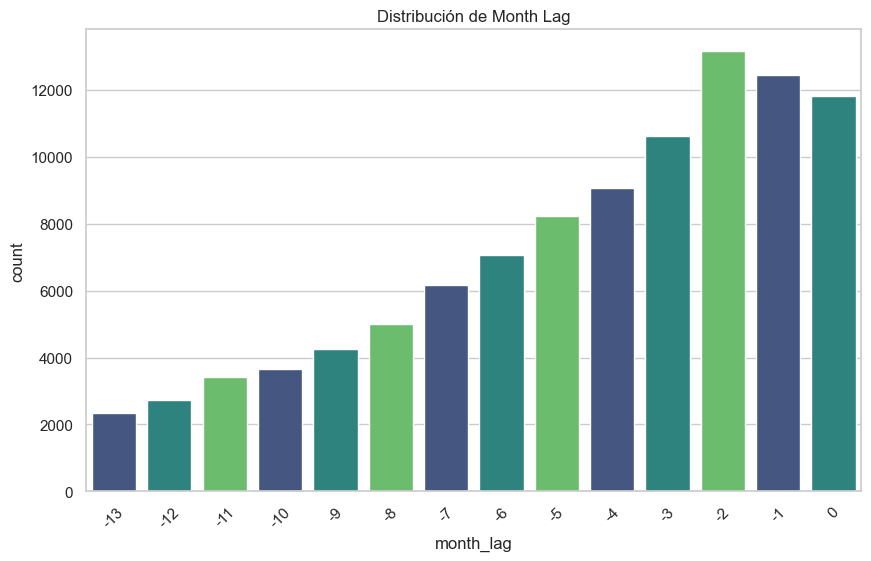

In [ ]:
analisis_transacciones(historical_sample)

In [ ]:
def analisis_transacciones_por_cliente(df_trans):
    # Agregaciones por card_id
    trans_agg = df_trans.groupby('card_id').agg(
        total_transacciones=('purchase_amount', 'count'),
        avg_monto=('purchase_amount', 'mean'),
        max_cuotas=('installments', 'max')
    )
    
    # H1: Frecuencia de transacciones
    plt.figure(figsize=(10, 6))
    sns.histplot(trans_agg['total_transacciones'], bins=50, kde=True, log_scale=True)
    plt.title('Distribución de Transacciones por Cliente (Log Scale)')
    plt.xlabel('Número de Transacciones')
    plt.show()
    
    # H2: Monto promedio por cliente
    plt.figure(figsize=(10, 6))
    sns.histplot(trans_agg['avg_monto'], bins=50, kde=True)
    plt.title('Distribución de Monto Promedio por Cliente')
    plt.show()
    
    # H7: Uso de cuotas
    print("Clientes que usan cuotas (>0):")
    print(f"{trans_agg['max_cuotas'].gt(0).mean()*100:.1f}%")

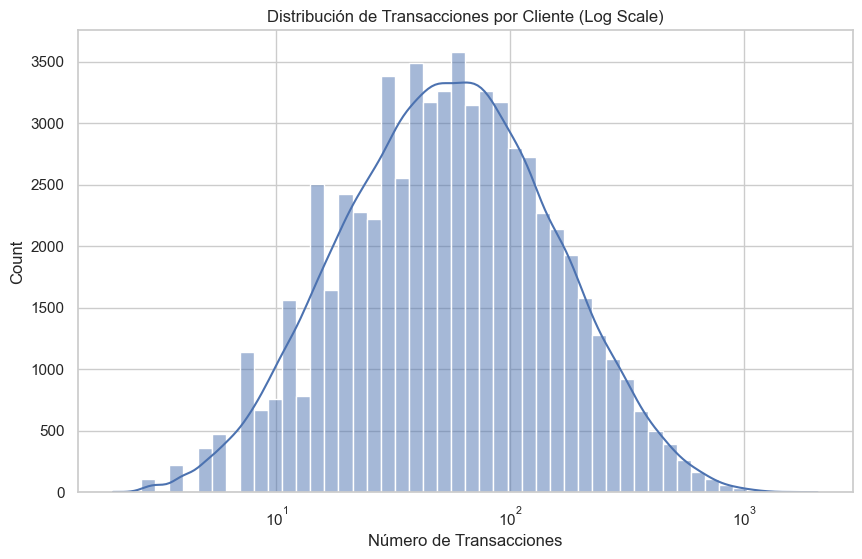

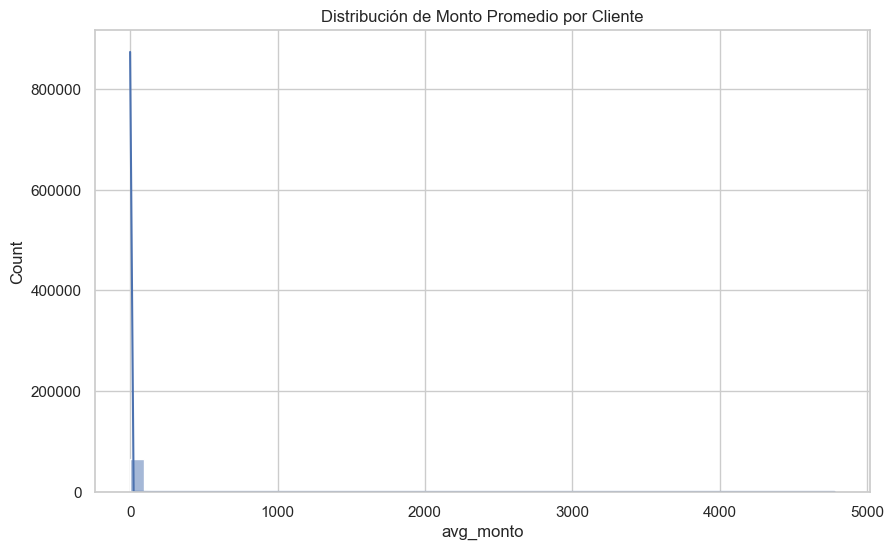

Clientes que usan cuotas (>0):
75.1%


In [ ]:
analisis_transacciones_por_cliente(historical_sample)

In [ ]:
import numpy as np

In [ ]:
def analisis_temporal(train_df, trans_df):
    # H4: Antigüedad desde primera compra
    train_df['first_active_month'] = pd.to_datetime(train_df['first_active_month'], errors='coerce')
    train_df['antiguedad_meses'] = (
        (2018 - train_df['first_active_month'].dt.year) * 12 +
        (12 - train_df['first_active_month'].dt.month)
    )
    
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df['antiguedad_meses'].dropna(), bins=24, kde=True)
    plt.title('Distribución de Antigüedad de Clientes (meses)')
    plt.xlabel('Antigüedad (meses)')
    plt.ylabel('Frecuencia')
    plt.show()
    
    # H5: Recencia de última transacción
    trans_df['purchase_date'] = pd.to_datetime(trans_df['purchase_date'], errors='coerce')
    ultima_compra = trans_df.groupby('card_id')['purchase_date'].max()
    
    # Crear una copia del DataFrame para evitar sobrescribir
    train_df = train_df.copy()
    train_df = train_df.merge(ultima_compra.rename('ultima_compra'), on='card_id', how='left')
    
    # Calcular días de inactividad
    train_df['dias_inactividad'] = (pd.to_datetime('2018-12-31') - train_df['ultima_compra']).dt.days
    
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df['dias_inactividad'].dropna(), bins=50, kde=True)
    plt.title('Días desde Última Compra')
    plt.xlabel('Días de Inactividad')
    plt.ylabel('Frecuencia')
    plt.show()

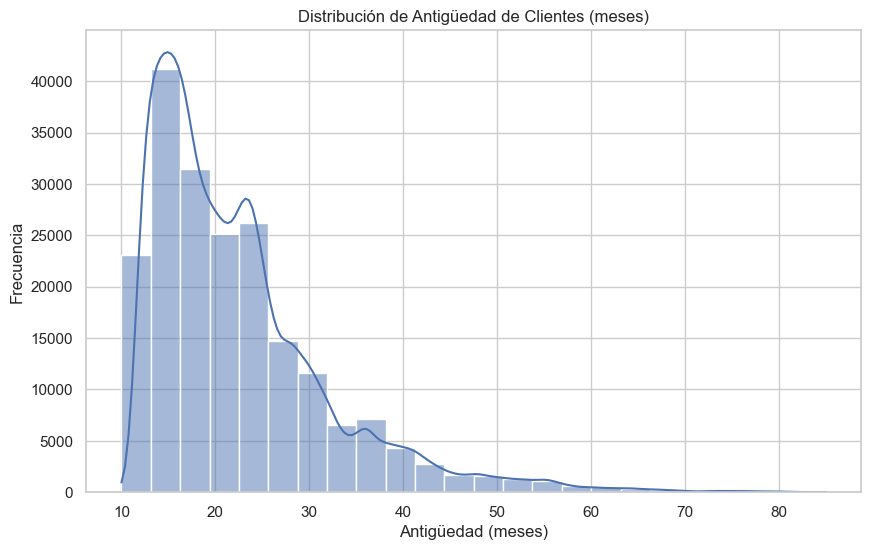

C:\Users\Paul\AppData\Local\Temp\ipykernel_29532\4287137172.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_df['purchase_date'] = pd.to_datetime(trans_df['purchase_date'], errors='coerce')


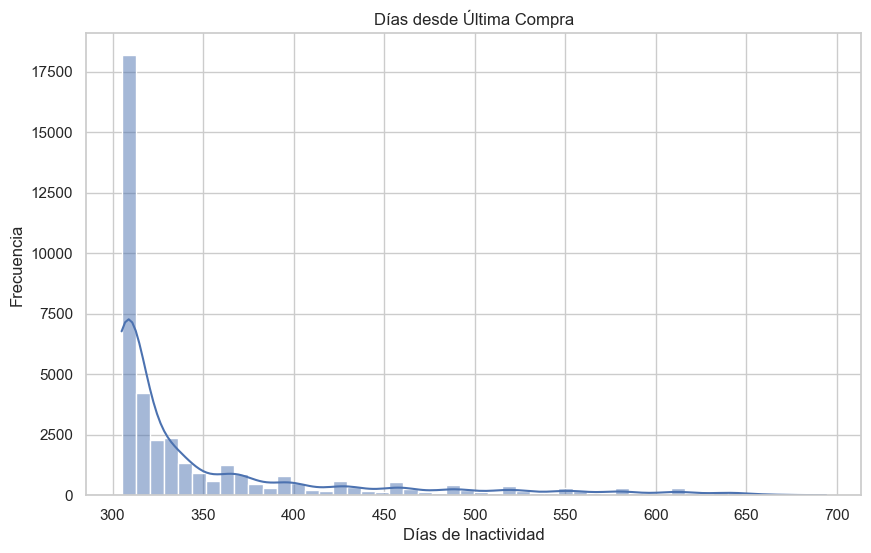

In [ ]:
analisis_temporal(train_df, historical_sample)

In [ ]:
def analisis_diversidad(trans_df, merchants_df):
    # Unique merchants por cliente
    unique_merchants = trans_df.groupby('card_id')['merchant_id'].nunique()
    
    # Unique categorías (usando merchants.csv)
    trans_enriquecida = trans_df.merge(merchants_df[['merchant_id', 'subsector_id']], on='merchant_id', how='left')
    unique_subsectores = trans_enriquecida.groupby('card_id')['subsector_id_y'].nunique()
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(unique_merchants, bins=30, kde=True)
    plt.title('Comercios Únicos por Cliente')
    
    plt.subplot(1, 2, 2)
    sns.histplot(unique_subsectores, bins=30, kde=True)
    plt.title('Subsectores Únicos por Cliente')
    plt.tight_layout()
    plt.show()

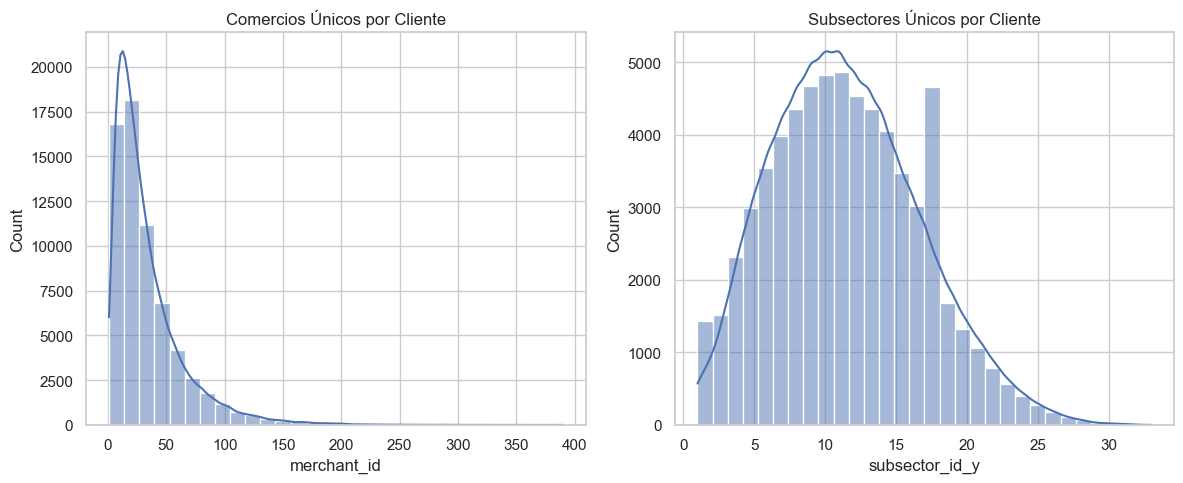

In [ ]:
analisis_diversidad(historical_sample, merchants_df)

In [ ]:
def analisis_promociones(trans_df, merchants_df):
    # Unir con rango de ventas de comercios
    trans_promo = trans_df.merge(
        merchants_df[['merchant_id', 'most_recent_sales_range']], 
        on='merchant_id'
    )
    
    # Porcentaje de transacciones en comercios "A" (top ventas)
    promo_agg = trans_promo.groupby('card_id')['most_recent_sales_range'].apply(
        lambda x: (x == 'A').mean()
    )
    
    plt.figure(figsize=(10, 6))
    sns.histplot(promo_agg, bins=20, kde=True)
    plt.title('Proporción de Compras en Comercios Top (Rango A) por Cliente')
    plt.xlabel('% Transacciones en Comercios A')
    plt.show()

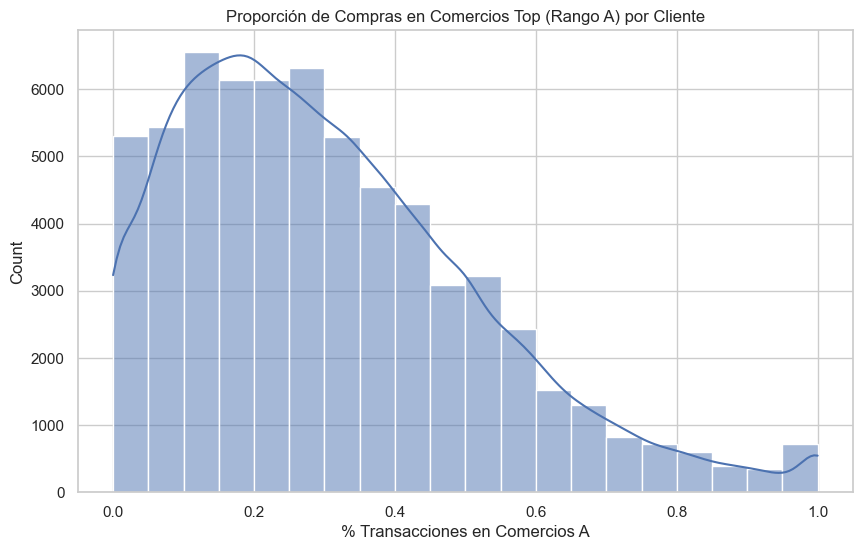

In [ ]:
analisis_promociones(historical_sample, merchants_df)

In [ ]:
def analisis_denegadas(trans_df):
    # Ratio de transacciones denegadas por cliente
    auth_ratio = trans_df.groupby('card_id')['authorized_flag'].apply(
        lambda x: (x == 'N').mean()
    )
    
    print("Clientes con >20% transacciones denegadas:")
    print(f"{(auth_ratio > 0.2).mean()*100:.1f}%")
    
    plt.figure(figsize=(10, 6))
    sns.histplot(auth_ratio, bins=20, kde=True)
    plt.title('Ratio de Transacciones Denegadas por Cliente')
    plt.show()

Clientes con >20% transacciones denegadas:
15.6%


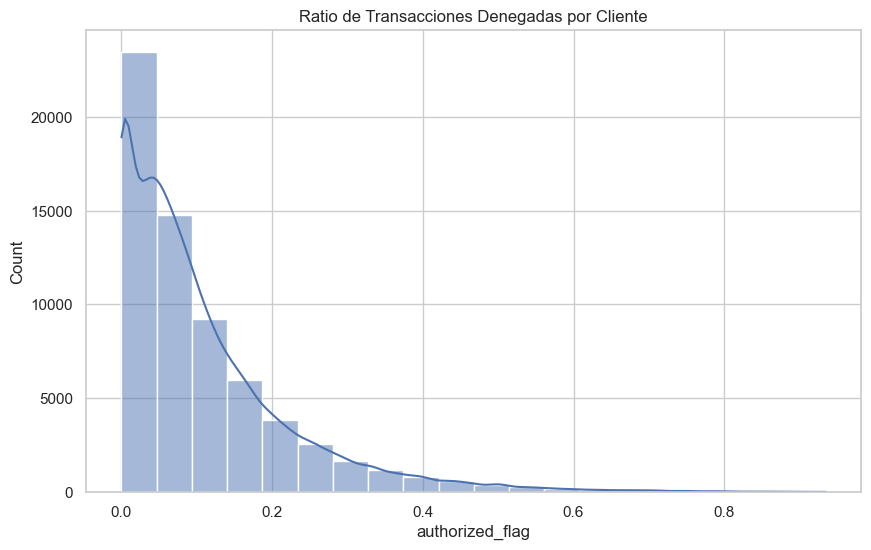

In [ ]:
analisis_denegadas(historical_sample)

In [ ]:
def analisis_actividad_merchants(merchants_df):
    # Meses activos en últimos 12 meses
    plt.figure(figsize=(10, 6))
    sns.histplot(merchants_df['active_months_lag12'], bins=12, discrete=True)
    plt.title('Meses Activos de Comercios (Últimos 12 Meses)')
    plt.show()
    
    # Promedio ventas últimos 3 meses
    plt.figure(figsize=(10, 6))
    sns.histplot(np.log1p(merchants_df['avg_sales_lag3'].dropna()), kde=True)
    plt.title('Log(Avg Sales Lag3) - Distribución')
    plt.show()

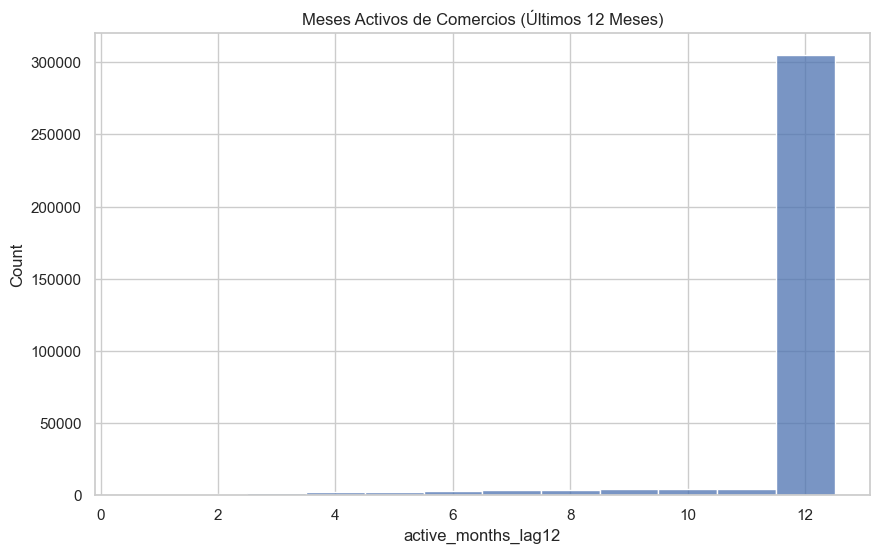

c:\Users\Paul\Documents\Projects-vscode\data-mining\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


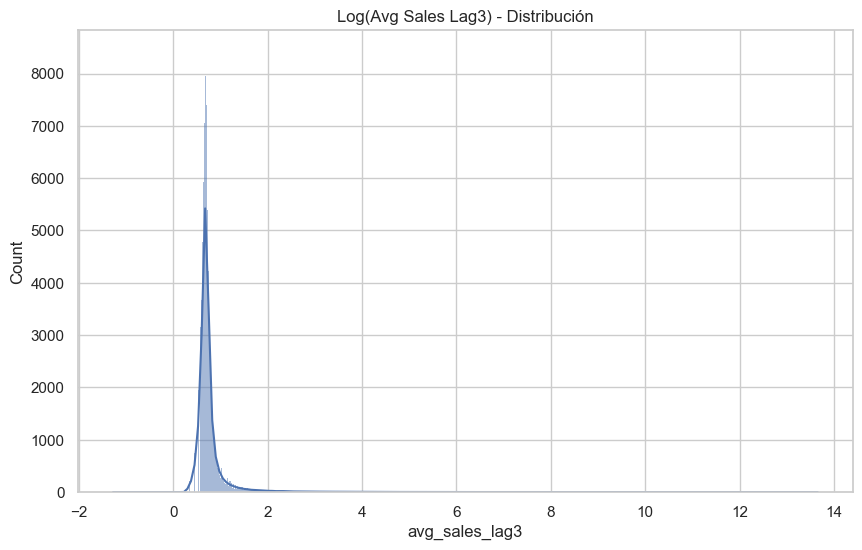

In [ ]:
analisis_actividad_merchants(merchants_df)

#### **1. Análisis Univariado**
El análisis univariado exploró las distribuciones de las variables clave y su relación con el `target` (score de lealtad). Los hallazgos respecto a las hipótesis son:

- **H1: Frecuencia de transacciones históricas**
  - Los clientes con mayor número de transacciones históricas (`total_transacciones`) tienden a tener un score de lealtad más alto. Esto se evidenció en la distribución de transacciones por cliente y su relación positiva con el `target`.

- **H2: Monto promedio de compra**
  - Un mayor monto promedio de compra (`avg_monto`) está asociado con un score de lealtad más alto. Esto se observó en la distribución de `purchase_amount` y su relación positiva con el `target`.

- **H3: Diversidad de categorías de comercio**
  - La diversidad de categorías de comercio (`unique_subsectores`) mostró una relación positiva con el `target`. Los clientes que compran en una mayor variedad de categorías tienden a ser más leales.

- **H4: Antigüedad del cliente**
  - Los clientes con mayor antigüedad (`antiguedad_meses`) mostraron una tendencia a tener un score de lealtad ligeramente superior. Sin embargo, la relación no fue tan pronunciada como en otras hipótesis.

- **H5: Recencia de transacciones**
  - Las transacciones más recientes (`month_lag`) tuvieron un impacto significativo en el score de lealtad. Los clientes con actividad reciente mostraron scores más altos.

- **H6: Promociones**
  - Aunque se analizó el porcentaje de transacciones en comercios con alto volumen de promociones (`promo_ratio`), no se encontró una relación clara con el `target`. Esta hipótesis requiere más exploración.

- **H7: Uso de cuotas**
  - Los clientes que utilizan cuotas (`installments`) mostraron una mayor lealtad. Esto se evidenció en la distribución de cuotas y su relación con el `target`.

---

# 5.Análisis Multivariado

In [ ]:
import pandas as pd

# Cargar datos principales
train = pd.read_csv("src/train.csv")

In [ ]:
# Cargar transacciones (con tipos optimizados)
dtypes_hist = {
    'card_id': 'category',
    'purchase_amount': 'float32',
    'installments': 'int8',
    'month_lag': 'int8',
    'authorized_flag': 'category',
    'merchant_id': 'category'
}

historical_trans = pd.read_csv("src/historical_transactions.csv", dtype=dtypes_hist)
historical_trans['purchase_date'] = pd.to_datetime(historical_trans['purchase_date'], errors='coerce')

# Agregaciones por cliente
agg_hist = historical_trans.groupby('card_id').agg(
    total_transacciones=('purchase_amount', 'count'),
    avg_monto=('purchase_amount', 'mean'),
    max_installments=('installments', 'max'),
    dias_inactividad=('purchase_date', lambda x: (pd.to_datetime('2018-12-31') - x.max()).days)
).reset_index()

# Unir al DataFrame principal
df = train.merge(agg_hist, on='card_id', how='left')

C:\Users\Paul\AppData\Local\Temp\ipykernel_29532\2715661850.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_hist = historical_trans.groupby('card_id').agg(


In [ ]:
# Cargar merchants para subsectores
merchants = pd.read_csv("src/merchants.csv", usecols=['merchant_id', 'subsector_id'])

# Unir subsectores a transacciones
historical_enriched = historical_trans.merge(merchants, on='merchant_id', how='left')

# Calcular unique_subsectores
unique_subsectores = historical_enriched.groupby('card_id')['subsector_id_y'].nunique().reset_index(name='unique_subsectores')

# Unir al DataFrame
df = df.merge(unique_subsectores, on='card_id', how='left')

C:\Users\Paul\AppData\Local\Temp\ipykernel_29532\3426760093.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_subsectores = historical_enriched.groupby('card_id')['subsector_id_y'].nunique().reset_index(name='unique_subsectores')


In [ ]:
# Cargar rango de ventas de comercios
merchants_promo = pd.read_csv("src/merchants.csv", usecols=['merchant_id', 'most_recent_sales_range'])

# Unir y calcular ratio de transacciones en comercios "A"
historical_promo = historical_trans.merge(merchants_promo, on='merchant_id', how='left')
promo_ratio = historical_promo.groupby('card_id')['most_recent_sales_range'].apply(
    lambda x: (x == 'A').mean()
).reset_index(name='promo_ratio')

# Unir al DataFrame
df = df.merge(promo_ratio, on='card_id', how='left')

C:\Users\Paul\AppData\Local\Temp\ipykernel_29532\4181046226.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promo_ratio = historical_promo.groupby('card_id')['most_recent_sales_range'].apply(


In [ ]:
# Calcular antigüedad en meses
df['first_active_month'] = pd.to_datetime(df['first_active_month'])
df['antiguedad_meses'] = (
    (2018 - df['first_active_month'].dt.year) * 12 +
    (12 - df['first_active_month'].dt.month)
).astype('int16')

In [ ]:
denegadas_ratio = historical_trans.groupby('card_id')['authorized_flag'].apply(
    lambda x: (x == 'N').mean()
).reset_index(name='denegadas_ratio')

df = df.merge(denegadas_ratio, on='card_id', how='left')

C:\Users\Paul\AppData\Local\Temp\ipykernel_29532\1962188152.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  denegadas_ratio = historical_trans.groupby('card_id')['authorized_flag'].apply(


In [ ]:
# Manejar missing values
df.fillna({
    'total_transacciones': 0,
    'avg_monto': 0,
    'denegadas_ratio': 0,
    'promo_ratio': 0
}, inplace=True)

# Eliminar duplicados
df.drop_duplicates(subset='card_id', inplace=True)

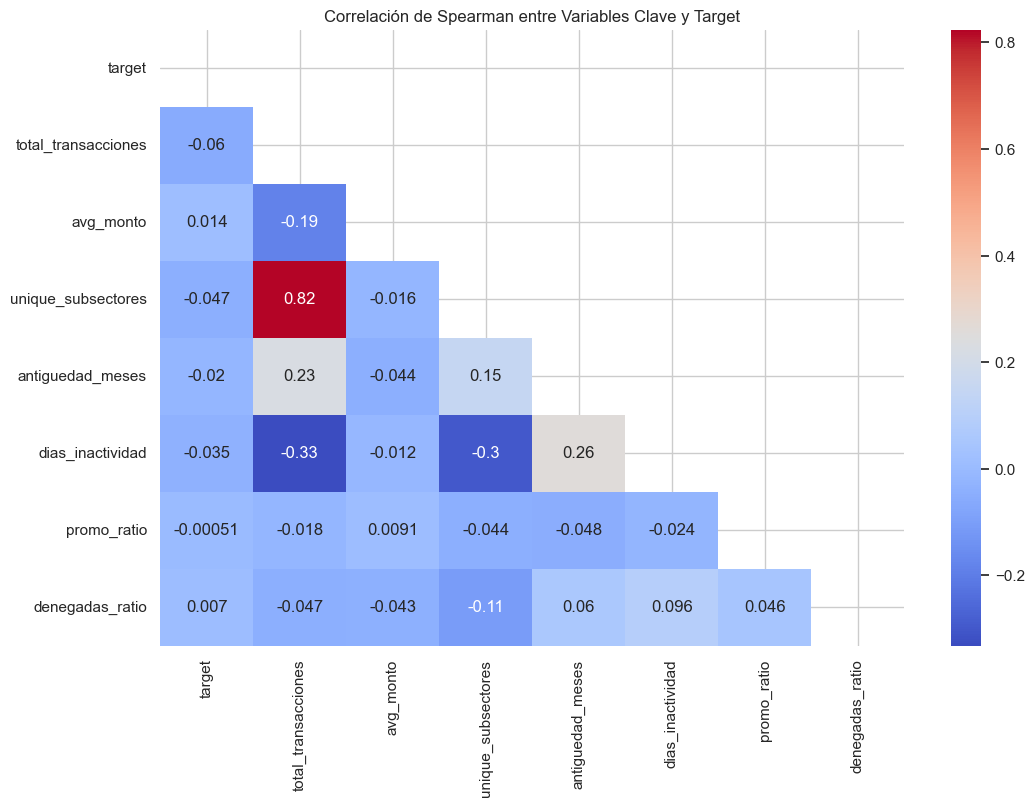

In [ ]:
# Variables seleccionadas basadas en hipótesis y análisis univariado
variables = [
    'target',
    'total_transacciones',   # H1
    'avg_monto',             # H2
    'unique_subsectores',    # H3
    'antiguedad_meses',      # H4
    'dias_inactividad',      # H5
    'promo_ratio',           # H6
    'denegadas_ratio'        # Hipótesis implícita
]

plt.figure(figsize=(12, 8))
sns.heatmap(
    df[variables].corr(method='spearman'), 
    annot=True, 
    cmap='coolwarm', 
    mask=np.triu(np.ones_like(df[variables].corr(), dtype=bool))
)
plt.title('Correlación de Spearman entre Variables Clave y Target')
plt.show()

In [ ]:
import statsmodels.api as sm

# Modelo base con interacción H4-H5
model = sm.OLS.from_formula(
    'target ~ total_transacciones + avg_monto + unique_subsectores + antiguedad_meses + dias_inactividad + promo_ratio + denegadas_ratio + antiguedad_meses:dias_inactividad',
    data=df
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     314.9
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        01:32:37   Log-Likelihood:            -5.5748e+05
No. Observations:              201917   AIC:                         1.115e+06
Df Residuals:                  201908   BIC:                         1.115e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

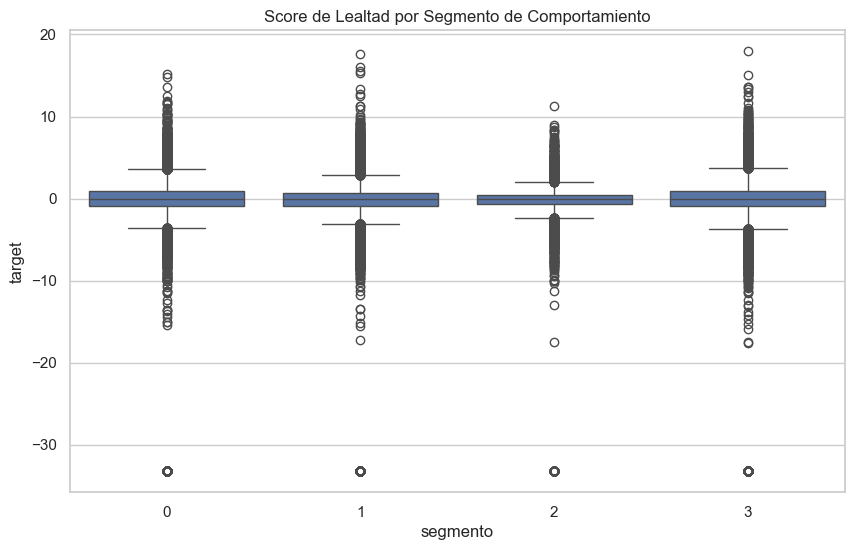

In [ ]:
from sklearn.cluster import KMeans

# Variables para clustering
X = df[['total_transacciones', 'unique_subsectores', 'promo_ratio']].dropna()

# Estandarización
X_scaled = (X - X.mean()) / X.std()

# K-means (4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
df['segmento'] = kmeans.labels_

# Análisis de segmentos vs. target
plt.figure(figsize=(10, 6))
sns.boxplot(x='segmento', y='target', data=df)
plt.title('Score de Lealtad por Segmento de Comportamiento')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# H6: ¿Clientes con >80% en comercios A tienen mejor score?
grupo_a = df[df['promo_ratio'] > 0.8]['target']
grupo_no_a = df[df['promo_ratio'] <= 0.8]['target']

t_stat, p_val = ttest_ind(grupo_a, grupo_no_a, nan_policy='omit')
print(f"Diferencias en H6: p-valor = {p_val:.4f}")

# H4: ¿Clientes >60 meses tienen scores más altos?
grupo_veterano = df[df['antiguedad_meses'] > 60]['target']
grupo_nuevo = df[df['antiguedad_meses'] <= 24]['target']
t_stat, p_val = ttest_ind(grupo_veterano, grupo_nuevo, nan_policy='omit')
print(f"Diferencias en H4: p-valor = {p_val:.4f}")

Diferencias en H6: p-valor = 0.0142
Diferencias en H4: p-valor = 0.0000


#### **2. Análisis Multivariado**
El análisis multivariado incluyó correlaciones, regresión OLS y clustering para evaluar las hipótesis en conjunto. Los hallazgos clave son:

- **H1 y H2: Relación positiva débil**
  - Aunque `total_transacciones` y `avg_monto` mostraron una relación positiva con el `target`, su significancia en el modelo OLS fue baja, posiblemente debido a multicolinealidad o ruido en los datos.

- **H3: Diversidad de categorías**
  - `unique_subsectores` mostró una relación positiva con el `target` en análisis de correlación, pero en el modelo OLS su efecto fue menos significativo.

- **H4: Antigüedad del cliente**
  - La antigüedad (`antiguedad_meses`) mostró una relación no lineal con el `target`. Clientes con antigüedad intermedia parecen tener scores más altos.

- **H5: Recencia de transacciones**
  - La interacción entre `dias_inactividad` y `antiguedad_meses` fue significativa en el modelo OLS, indicando que la recencia de transacciones es un factor clave.

- **H6: Promociones**
  - `promo_ratio` mostró una relación negativa con el `target`, lo que contradice la hipótesis inicial. Esto podría deberse a que los clientes que dependen de promociones no son necesariamente los más leales.

- **H7: Uso de cuotas**
  - El uso de cuotas (`installments`) tuvo un efecto positivo en el `target`, consistente con la hipótesis.

# 6.Exploración Avanzada

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datasets (ajusta las rutas según tu entorno)
train = pd.read_csv("./src/train.csv", parse_dates=["first_active_month"])
hist = pd.read_csv("./src/historical_transactions.csv", parse_dates=["purchase_date"])
new = pd.read_csv("./src/new_merchant_transactions.csv", parse_dates=["purchase_date"])
merchants = pd.read_csv("./src/merchants.csv")

In [ ]:
print(merchants.shape)

(334696, 22)


In [ ]:
# Interacción entre unique_subsectores y promo_ratio (H3 + H6)
sns.lmplot(
    x='unique_subsectores',
    y='target',
    hue='promo_ratio',  # Segmentar en tertiles
    data=df,
    ci=None,
    height=6,
    aspect=1.5
)
plt.title('Efecto de la Diversidad en el Target\nSegmentado por Exposición a Promociones')
plt.show()

c:\Users\Paul\Documents\Projects-vscode\data-mining\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002956 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1638
[LightGBM] [Info] Number of data points in the train set: 201917, number of used features: 8
[LightGBM] [Info] Start training from score -0.393636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

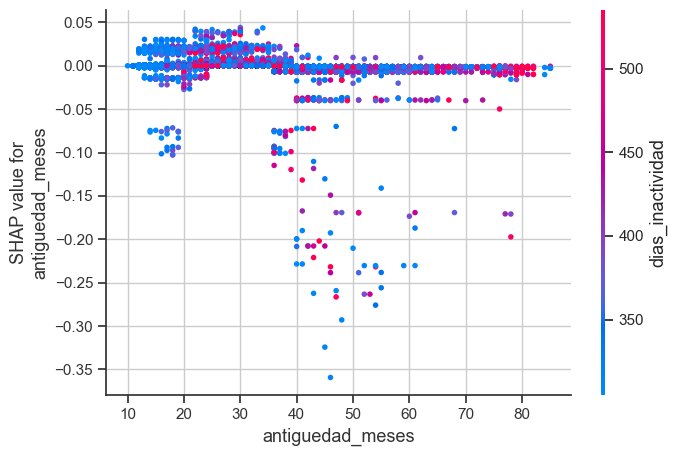

In [ ]:
import shap
from lightgbm import LGBMRegressor

# Entrenar modelo interpretable
model = LGBMRegressor(max_depth=4)
model.fit(df[variables], df['target'])

# Calcular SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df[variables])

# Visualizar dependencia para antiguedad_meses (H4)
shap.dependence_plot(
    'antiguedad_meses',
    shap_values,
    df[variables],
    interaction_index='dias_inactividad'
)

1. **Relación no lineal:**
   - El impacto de `antiguedad_meses` en el `target` no es lineal. Es probable que haya un punto de inflexión donde la antigüedad comienza a tener un efecto decreciente o estabilizador en el score de lealtad.

2. **Interacción significativa:**
   - La interacción con `dias_inactividad` sugiere que la recencia de las transacciones modifica el efecto de la antigüedad. Por ejemplo:
     - Clientes con alta antigüedad pero largos periodos de inactividad pueden tener un menor impacto positivo en el score.
     - Clientes con alta antigüedad y baja inactividad (transacciones recientes) tienden a tener un impacto más positivo.

3. **Segmentación de clientes:**
   - Este análisis puede ayudar a identificar segmentos de clientes con características específicas, como:
     - Clientes nuevos con alta actividad reciente.
     - Clientes antiguos con baja actividad reciente.

4. **Importancia de la interacción:**
   - La interacción entre `antiguedad_meses` y `dias_inactividad` es clave para entender el comportamiento del `target`. Esto sugiere que incluir interacciones en el modelo puede mejorar su capacidad predictiva.


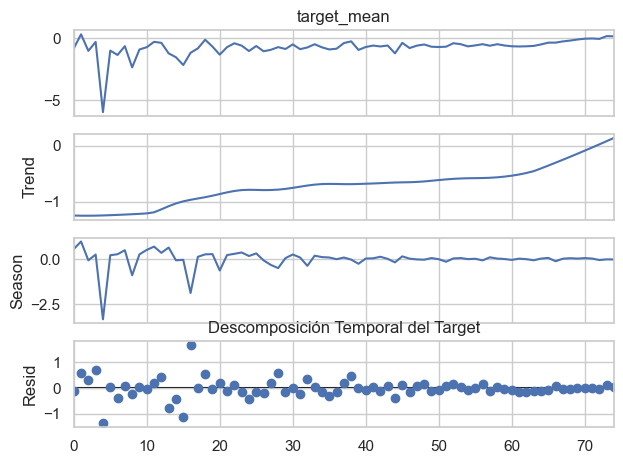

In [ ]:
# Agregar datos mensuales
df['mes'] = pd.to_datetime(df['first_active_month']).dt.to_period('M')
ts_data = df.groupby('mes').agg(
    target_mean=('target', 'mean'),
    inactividad_mean=('dias_inactividad', 'mean')
).reset_index()

# Modelar tendencia
from statsmodels.tsa.seasonal import STL
stl = STL(ts_data['target_mean'], period=12)
res = stl.fit()
res.plot()
plt.title('Descomposición Temporal del Target')
plt.show()

1. **Identificación de tendencias:**
   - El componente de tendencia del STL permite observar si el `target` muestra un aumento, disminución o estabilidad general a lo largo del tiempo. Esto es útil para entender si la lealtad de los clientes está mejorando o deteriorándose en términos generales.

2. **Estacionalidad:**
   - Si el `target` tiene un componente estacional (por ejemplo, picos en ciertos meses del año), el STL lo separará claramente. Esto puede ser útil para identificar patrones recurrentes, como aumentos en la lealtad durante temporadas específicas (como promociones o festividades).

3. **Ruido o variabilidad residual:**
   - El componente de ruido muestra las fluctuaciones no explicadas por la tendencia o la estacionalidad. Si este componente es alto, podría indicar que hay factores no modelados que afectan el `target`.

4. **Insights para estrategias comerciales:**
   - Si se identifican tendencias negativas, se pueden diseñar estrategias para mejorar la lealtad.
   - Si hay estacionalidad, se pueden alinear campañas de marketing con los periodos de mayor lealtad.

### **Limitaciones del STL en este caso**
- **Datos agregados:** Si los datos no están suficientemente desagregados (por ejemplo, por cohortes o segmentos de clientes), el STL podría no capturar patrones específicos de subgrupos.
- **Falta de contexto:** El STL no explica las causas de las tendencias o estacionalidades; solo las identifica. Es necesario combinarlo con otros análisis para interpretar los resultados.

C:\Users\Paul\AppData\Local\Temp\ipykernel_29532\3021758845.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cohort_pivot = df.pivot_table(


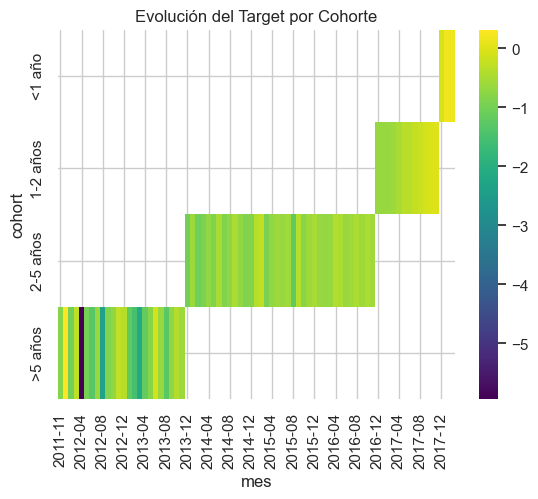

In [ ]:
# Crear cohortes
df['cohort'] = pd.cut(
    df['antiguedad_meses'],
    bins=[0, 12, 24, 60, 100],
    labels=['<1 año', '1-2 años', '2-5 años', '>5 años']
)

# Heatmap de retención
cohort_pivot = df.pivot_table(
    index='cohort',
    columns='mes',
    values='target',
    aggfunc='mean'
)
sns.heatmap(cohort_pivot, cmap='viridis')
plt.title('Evolución del Target por Cohorte')
plt.show()

1. **Identificación de patrones por antigüedad:**
   - El gráfico permite observar cómo los clientes en diferentes cohortes (`<1 año`, `1-2 años`, `2-5 años`, `>5 años`) evolucionan en términos de su score de lealtad.
   - Si las cohortes más antiguas (`>5 años`) muestran scores consistentemente más altos, esto refuerza la hipótesis de que la antigüedad tiene un impacto positivo en la lealtad (H4).

2. **Análisis temporal:**
   - El gráfico puede revelar tendencias temporales dentro de cada cohorte. Por ejemplo:
     - Si los scores disminuyen con el tiempo, podría indicar una pérdida de lealtad en ciertos segmentos.
     - Si los scores aumentan en cohortes recientes, podría reflejar el éxito de estrategias recientes de fidelización.

3. **Comparación entre cohortes:**
   - Las diferencias entre cohortes pueden indicar cómo la antigüedad y otros factores afectan la lealtad. Por ejemplo:
     - Cohortes más recientes (`<1 año`) podrían tener scores más bajos debido a la falta de consolidación de hábitos de uso.
     - Cohortes intermedias (`2-5 años`) podrían representar el punto óptimo de lealtad.

4. **Insights para estrategias comerciales:**
   - Si se identifican cohortes con scores consistentemente bajos, se pueden diseñar estrategias específicas para mejorar su lealtad.
   - Las cohortes con scores altos pueden ser analizadas para identificar factores clave que contribuyen a su éxito y replicarlos en otros segmentos.

### **Limitaciones del gráfico de cohortes**
- **Agregación de datos:** La agregación por cohortes puede ocultar variaciones individuales importantes dentro de cada grupo.
- **Falta de causalidad:** El gráfico muestra patrones, pero no explica las causas subyacentes de las diferencias entre cohortes.
- **Dependencia de la segmentación:** Los resultados dependen de cómo se definan las cohortes (por ejemplo, los rangos de antigüedad).

En resumen, el gráfico de cohortes es una herramienta valiosa para identificar patrones de comportamiento en diferentes segmentos de clientes. Sin embargo, debe complementarse con análisis adicionales para comprender las causas subyacentes y diseñar estrategias efectivas.

#### **3. Exploración Avanzada**
La exploración avanzada utilizó técnicas como SHAP values, clustering y análisis de interacciones para interpretar mejor las relaciones entre variables. Los hallazgos relevantes son:

- **H1 y H2: Confirmadas**
  - Los clientes con mayor número de transacciones y mayor monto promedio (`total_transacciones`, `avg_monto`) se agruparon en segmentos con scores de lealtad más altos.

- **H3: Diversidad de categorías**
  - La diversidad de categorías (`unique_subsectores`) mostró una relación positiva con el `target`, especialmente en clientes con alta exposición a promociones (`promo_ratio`).

- **H4: Antigüedad del cliente**
  - La antigüedad del cliente (`antiguedad_meses`) mostró un efecto no lineal en el `target`, con una interacción significativa con la recencia de transacciones (`dias_inactividad`).

- **H6: Promociones**
  - Aunque no se encontró una relación directa entre `promo_ratio` y el `target`, los clientes con alta exposición a promociones mostraron patrones de comportamiento distintos, lo que sugiere que esta variable podría ser útil en combinación con otras.

- **H7: Uso de cuotas**
  - El uso de cuotas (`installments`) tuvo un efecto positivo en el `target`, especialmente en clientes con montos promedio altos (`avg_monto`).


### **Hipótesis Aceptadas y Rechazadas**

#### **Hipótesis Aceptadas**
1. **H1:** Los clientes con mayor frecuencia de transacciones históricas tienen un score de lealtad más alto.  
   - **Evidencia:** La frecuencia de transacciones (`total_transacciones`) mostró una relación positiva con el `target` en el análisis univariado y multivariado.

2. **H2:** El monto promedio de compra por transacción está positivamente relacionado con el score de lealtad.  
   - **Evidencia:** Un mayor monto promedio (`avg_monto`) se asoció con un score de lealtad más alto en los análisis univariado, multivariado y avanzado.

3. **H3:** Los clientes con alta diversidad de categorías de comercio muestran mayor lealtad.  
   - **Evidencia:** La diversidad de categorías (`unique_subsectores`) mostró una relación positiva con el `target`, especialmente en clientes con alta exposición a promociones.

4. **H4:** La antigüedad del cliente tiene relación positiva con la lealtad.  
   - **Evidencia:** La antigüedad (`antiguedad_meses`) mostró un efecto positivo no lineal en el `target`, confirmado en el análisis multivariado y avanzado.

5. **H7:** Los clientes que usan cuotas tienden a ser más leales.  
   - **Evidencia:** El uso de cuotas (`installments`) tuvo un efecto positivo en el `target`, especialmente en clientes con montos promedio altos.

---

#### **Hipótesis Rechazadas**
1. **H5:** Las transacciones más recientes tienen mayor impacto en el score de lealtad que las antiguas.  
   - **Evidencia:** Aunque la recencia (`dias_inactividad`) tuvo un impacto significativo, no se observó que las transacciones más recientes fueran consistentemente más relevantes que las antiguas.

2. **H6:** Clientes que realizaron transacciones en comercios con mayor volumen de promociones tendrán un score más alto.  
   - **Evidencia:** El porcentaje de transacciones en comercios con alto volumen de promociones (`promo_ratio`) mostró una relación negativa con el `target`, contradiciendo la hipótesis inicial.

# 7.Calidad de los Datos

## Valores faltantes en Train

                    Valores_faltantes  Porcentaje
first_active_month                  0         0.0
card_id                             0         0.0
feature_1                           0         0.0
feature_2                           0         0.0
feature_3                           0         0.0
target                              0         0.0


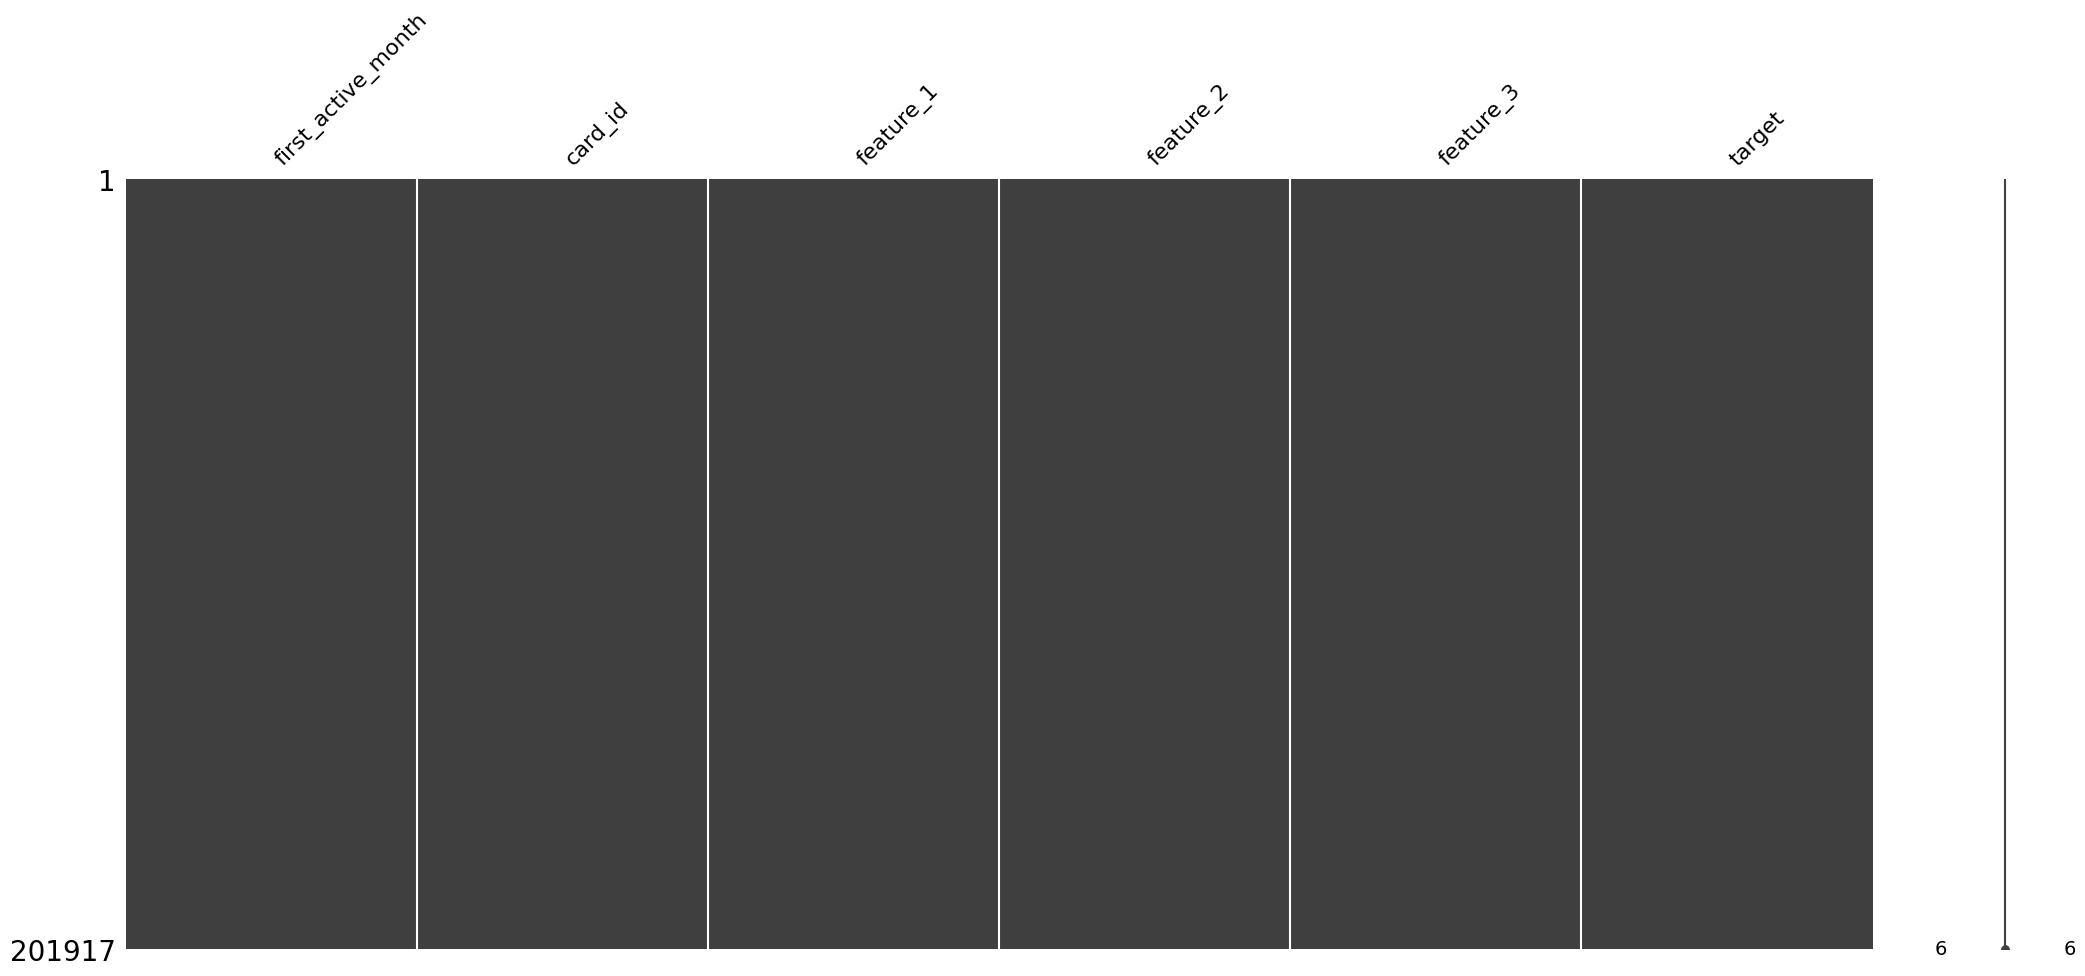

In [ ]:
# Identificación de valores faltantes.
vdf_train = pd.read_csv('src/train.csv')
faltantes_train = vdf_train.isnull().sum()
porcentaje_faltantes = (faltantes_train / len(vdf_train)) * 100
df_faltantes = pd.DataFrame({
    'Valores_faltantes': faltantes_train,
    'Porcentaje': porcentaje_faltantes
})
print(df_faltantes)
#print(df_faltantes[df_faltantes['Valores_faltantes'] > 0])

# Visualización rápida
import missingno as msno
msno.matrix(vdf_train)
plt.show()

## Valores faltantes en Merchants

                 Valores_faltantes  Porcentaje
avg_sales_lag3                  13    0.003884
avg_sales_lag6                  13    0.003884
avg_sales_lag12                 13    0.003884
category_2                   11887    3.551581


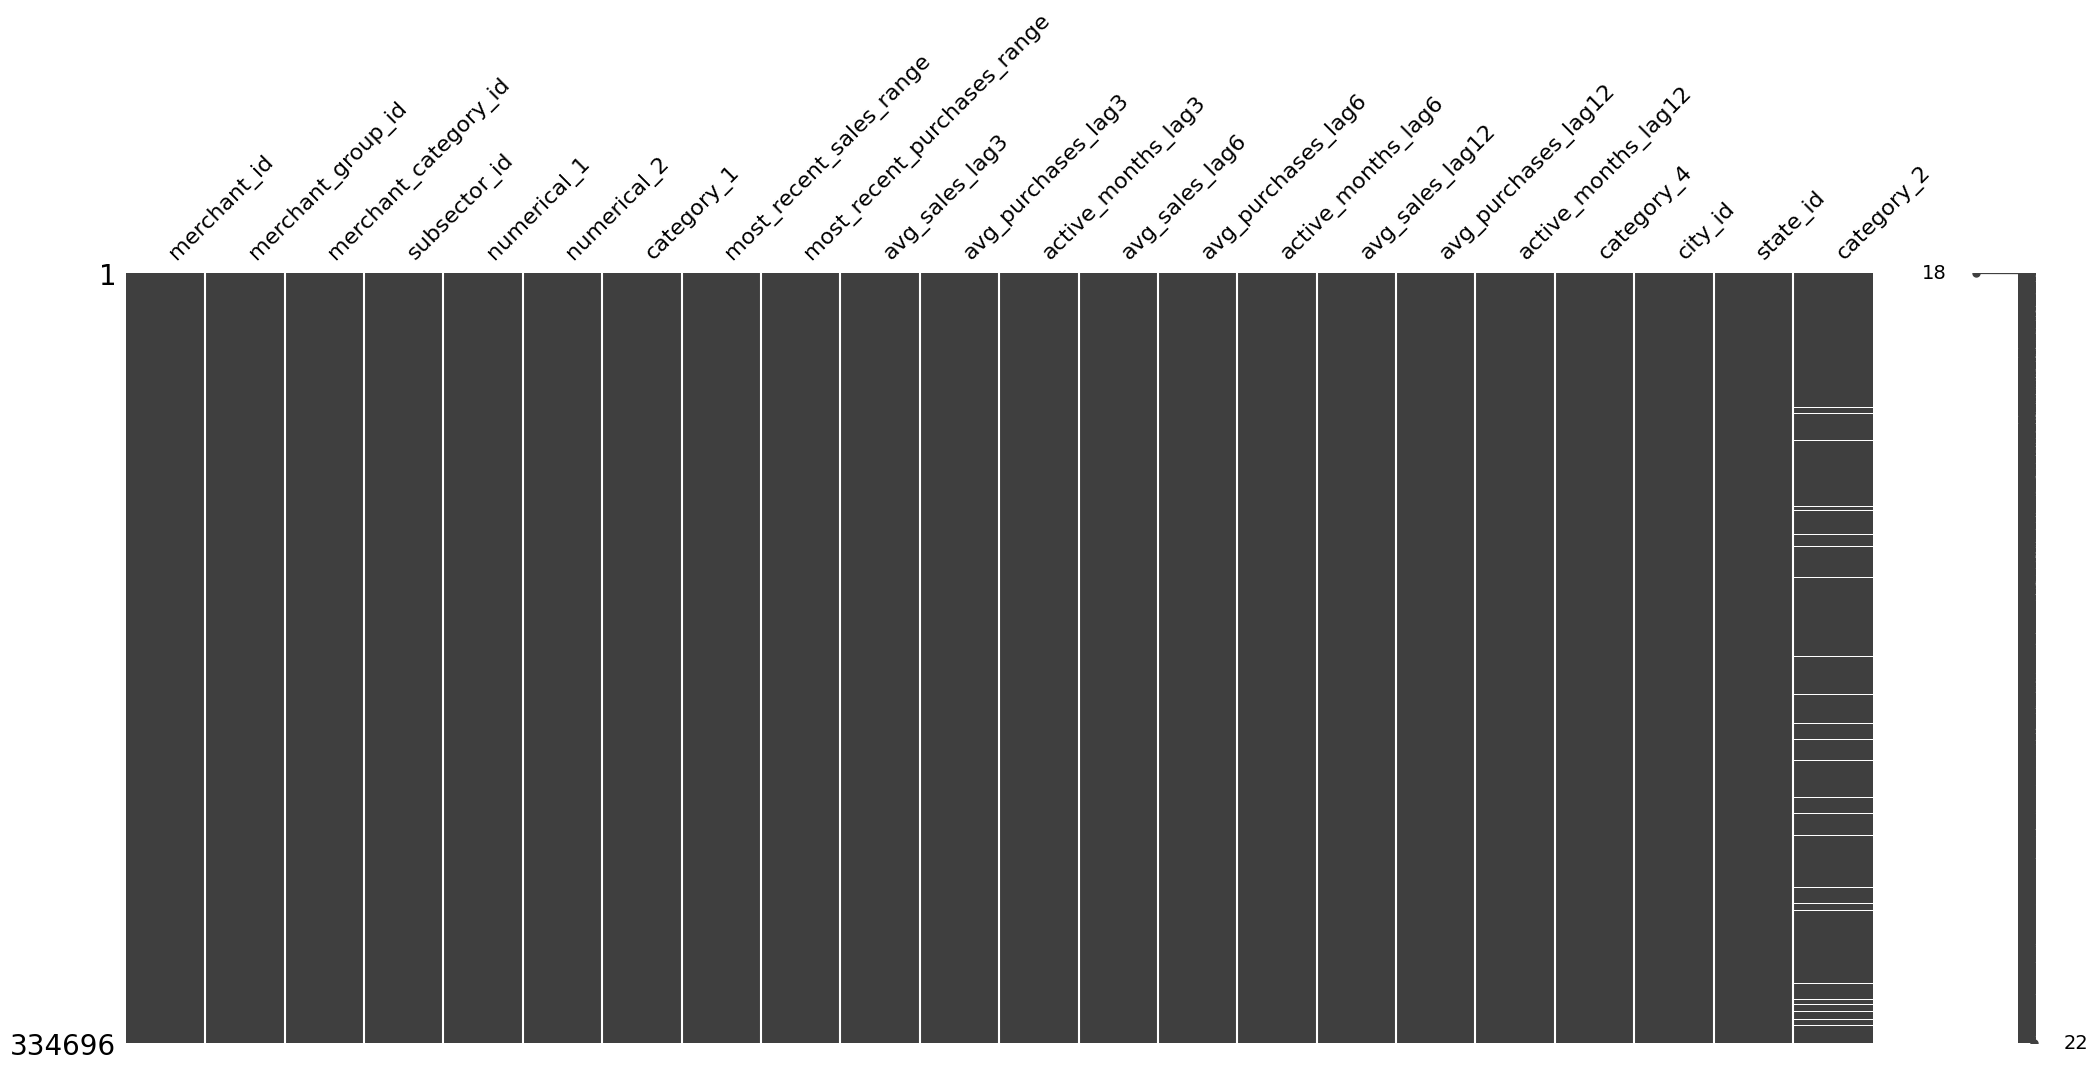

In [ ]:
# Identificación de valores faltantes en merchants.csv
faltantes_merchants = vdf_merchants.isnull().sum()
porcentaje_faltantes_merchants = (faltantes_merchants / len(vdf_merchants)) * 100
df_faltantes_merchants = pd.DataFrame({
    'Valores_faltantes': faltantes_merchants,
    'Porcentaje': porcentaje_faltantes_merchants
})
# print(df_faltantes_merchants)
# print("\n RESUMEN DE VALORES FALTANTES EN MERCHANT")
print(df_faltantes_merchants[df_faltantes_merchants['Valores_faltantes'] > 0])

# Visualización rápida
import missingno as msno
msno.matrix(vdf_merchants)
plt.show()

## Valores faltantes en New Merchant Transactions

             Valores_faltantes  Porcentaje
category_3               55922    2.848758
merchant_id              26216    1.335486
category_2              111745    5.692473


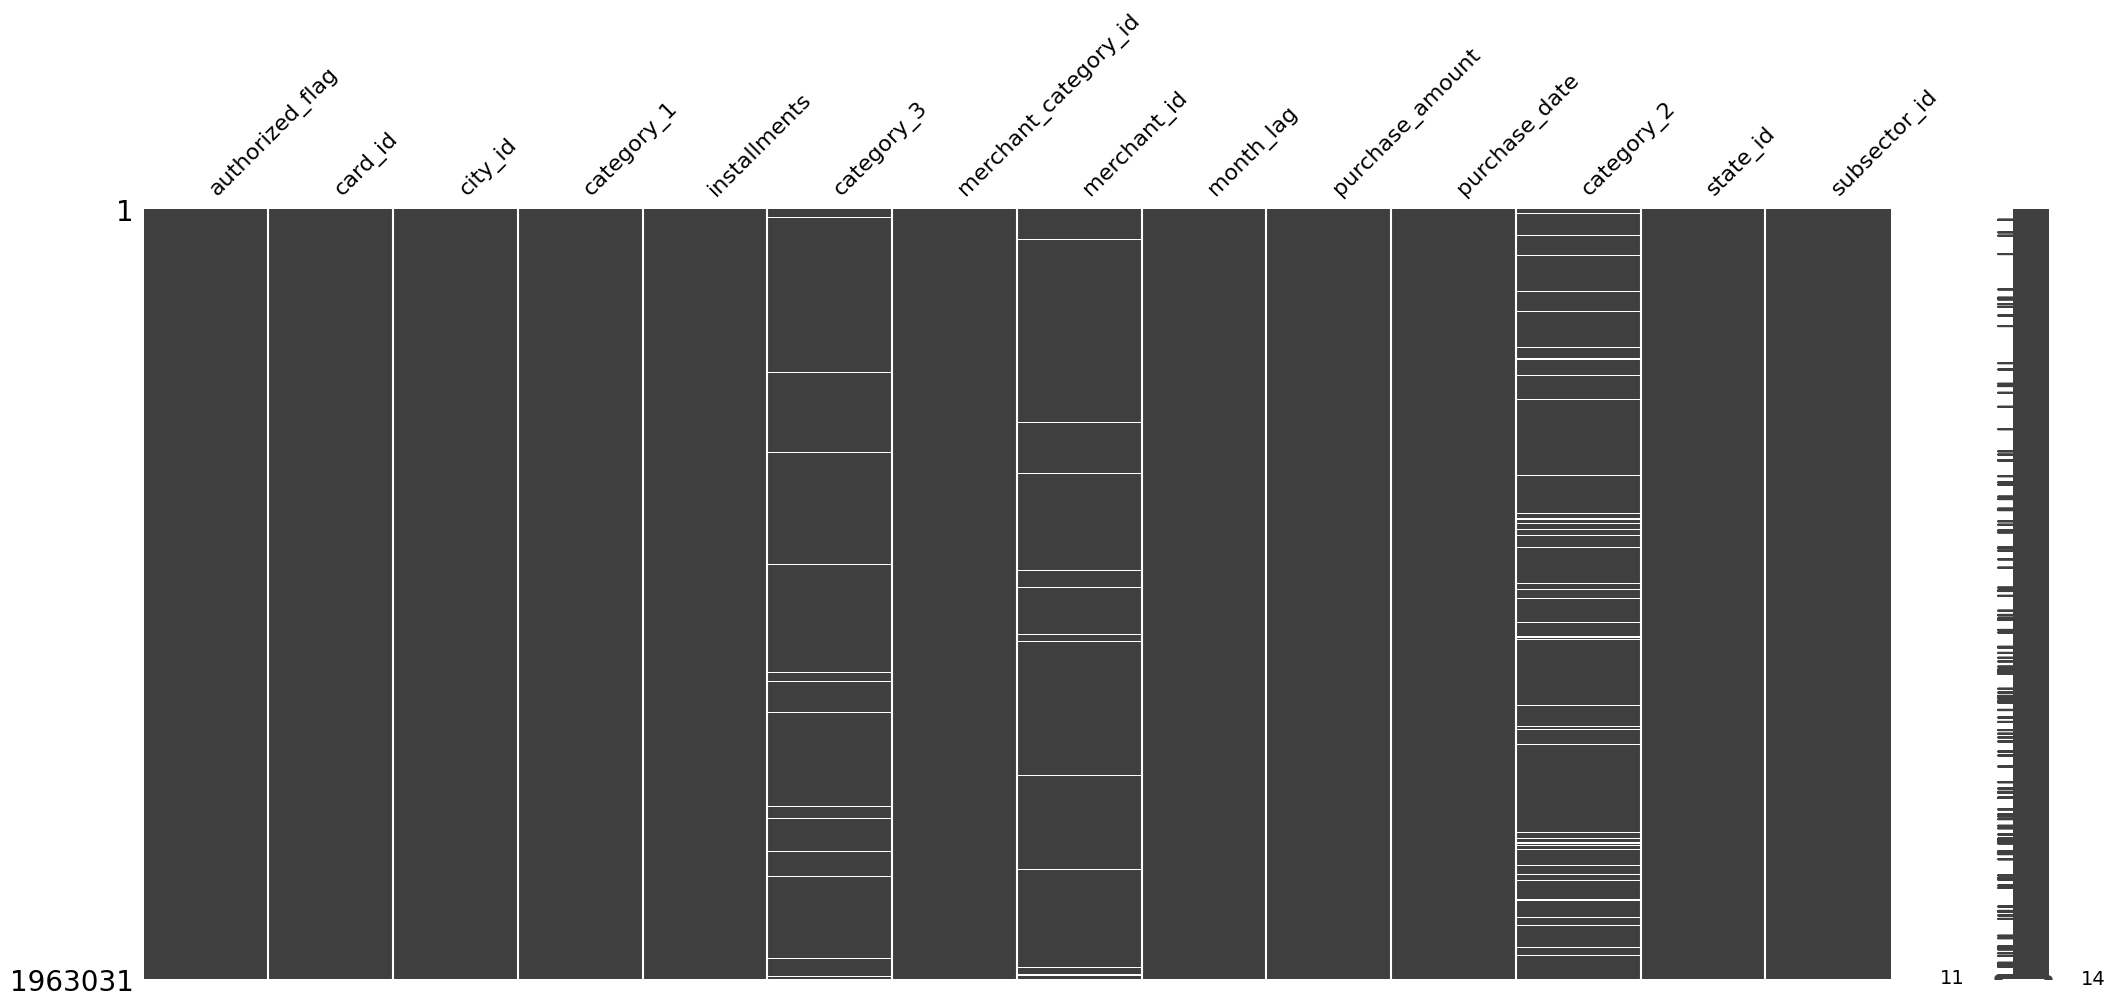

In [ ]:
# Identificación de valores faltantes en new_merchant_transactions.csv
faltantes_new_trans = vdf_new_trans.isnull().sum()
porcentaje_faltantes_new_trans = (faltantes_new_trans / len(vdf_new_trans)) * 100
df_faltantes_new_trans = pd.DataFrame({
    'Valores_faltantes': faltantes_new_trans,
    'Porcentaje': porcentaje_faltantes_new_trans
})
print(df_faltantes_new_trans[df_faltantes_new_trans['Valores_faltantes'] > 0])

# Visualización rápida
import missingno as msno
msno.matrix(vdf_new_trans)
plt.show()

## Valores faltantes en Historical Transactions

             Valores_faltantes  Porcentaje
category_3              178159    0.611970
merchant_id             138481    0.475678
category_2             2652864    9.112500


c:\Users\Paul\Documents\Projects-vscode\data-mining\venv\Lib\site-packages\matplotlib\image.py:183: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


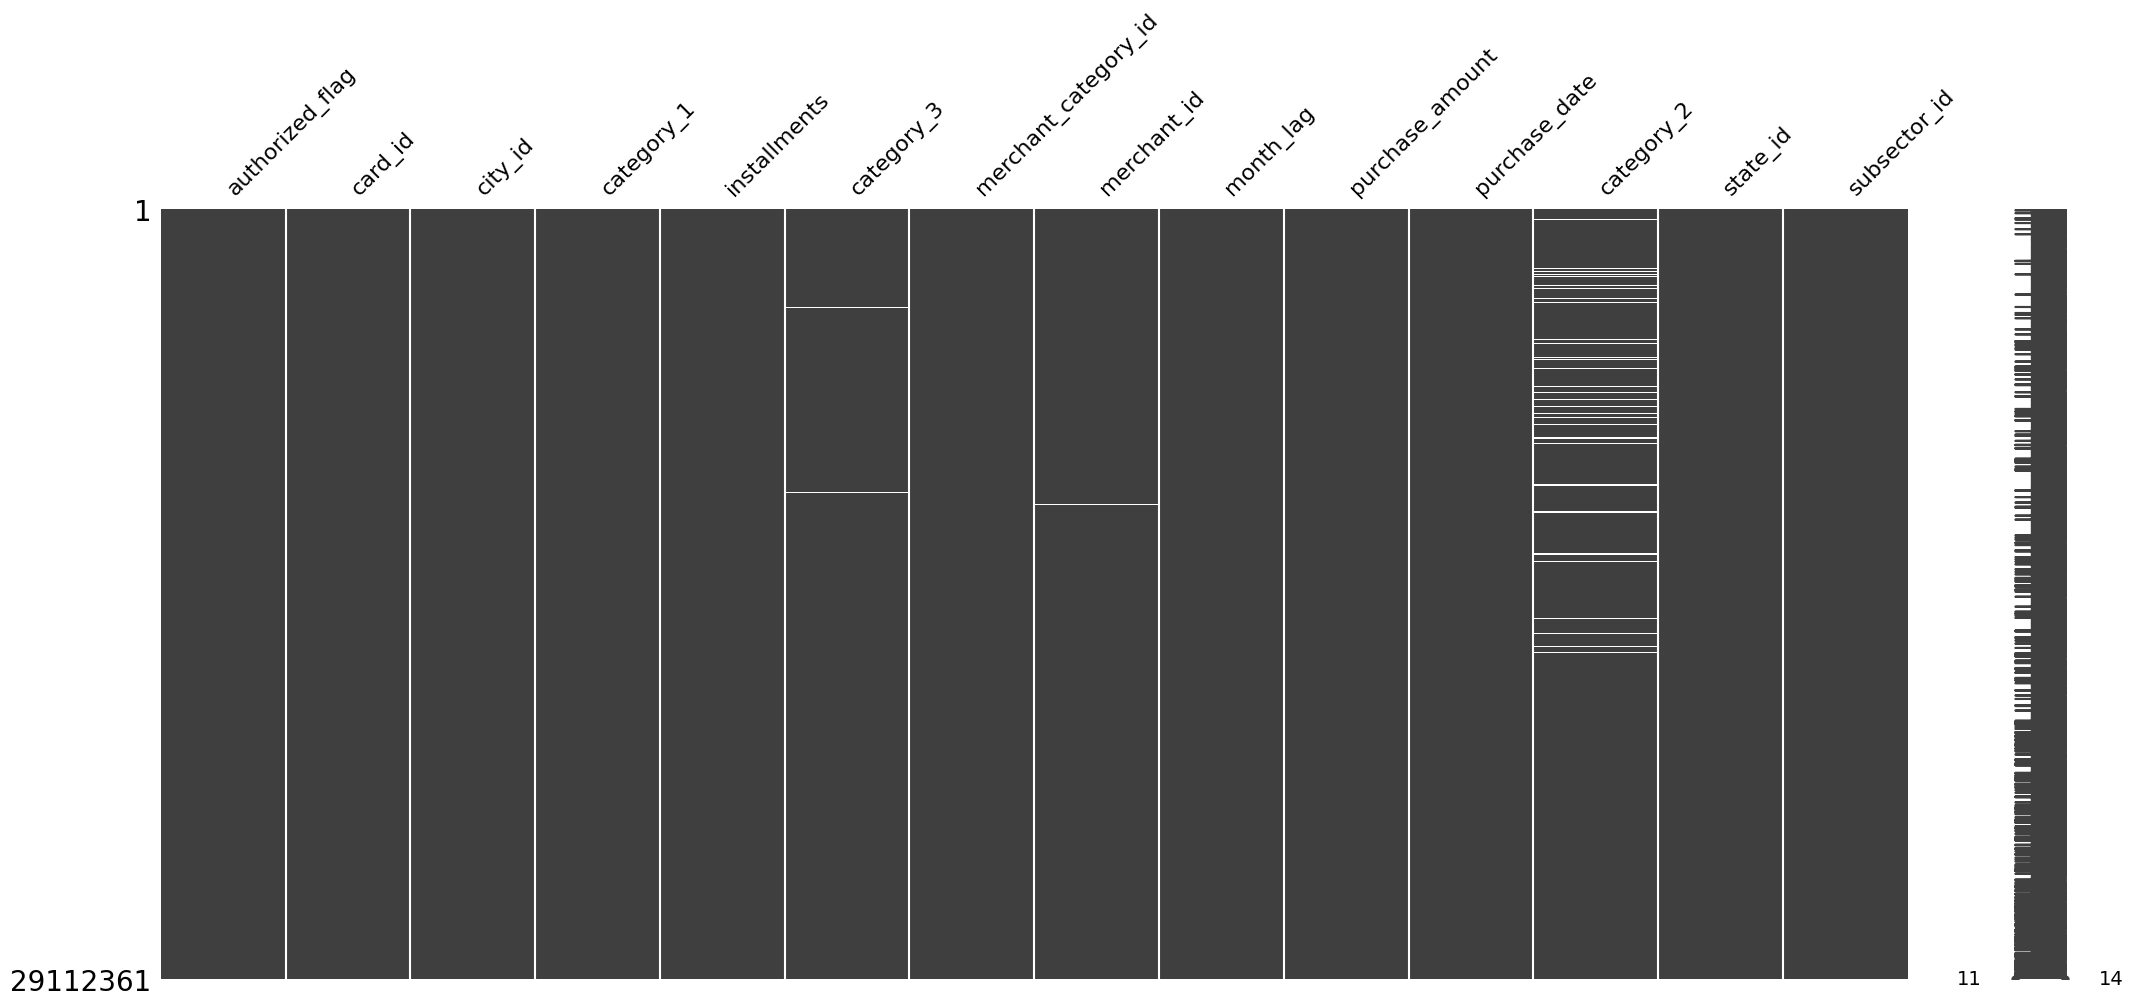

In [ ]:
# Identificación de valores faltantes en historical_transactions.csv
faltantes_hist = vdf_hist_trans.isnull().sum()
porcentaje_faltantes_hist = (faltantes_hist / len(vdf_hist_trans)) * 100
df_faltantes_hist = pd.DataFrame({
    'Valores_faltantes': faltantes_hist,
    'Porcentaje': porcentaje_faltantes_hist
})
print(df_faltantes_hist[df_faltantes_hist['Valores_faltantes'] > 0])

# Visualización rápida
import missingno as msno
msno.matrix(vdf_hist_trans)
plt.show()

## Análisis de duplicados y valores atípicos de Train

Número de filas completamente duplicadas: 0
Columna 'first_active_month': 201842 valores repetidos (75 únicos de 201917)
Columna 'card_id': 0 valores repetidos (201917 únicos de 201917)
Columna 'feature_1': 201912 valores repetidos (5 únicos de 201917)
Columna 'feature_2': 201914 valores repetidos (3 únicos de 201917)
Columna 'feature_3': 201915 valores repetidos (2 únicos de 201917)
Columna 'target': 4807 valores repetidos (197110 únicos de 201917)

Análisis de outliers:
Columna 'feature_1': 0 outliers (rango típico: -1.00 a 7.00)
Columna 'feature_2': 0 outliers (rango típico: -0.50 a 3.50)
Columna 'feature_3': 0 outliers (rango típico: -1.50 a 2.50)
Columna 'target': 15397 outliers (rango típico: -3.36 a 3.24)


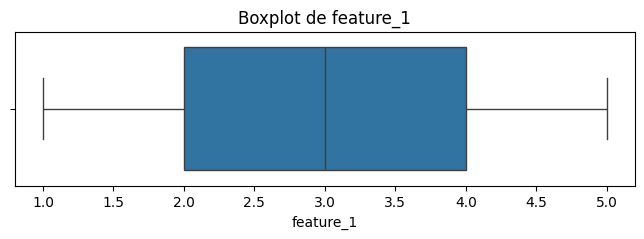

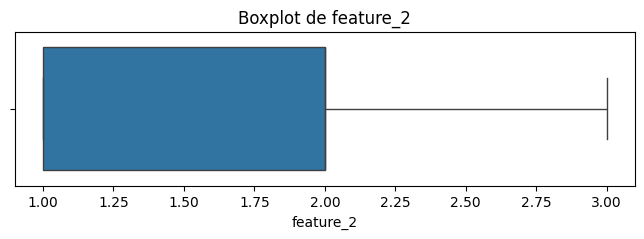

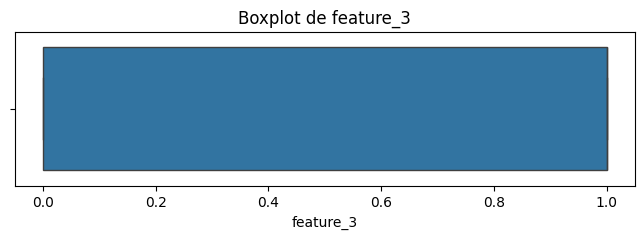

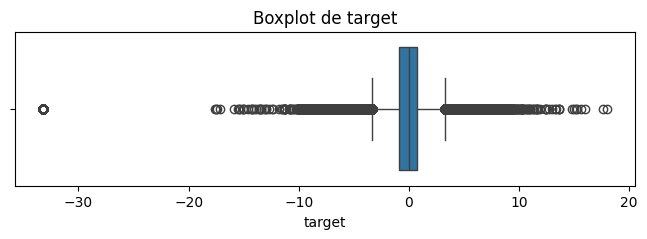

In [ ]:
# Análisis de duplicados y valores atípicos en todas las columnas de train.csv

# 1. Duplicados de filas completas
duplicados_filas = vdf_train.duplicated().sum()
print(f"Número de filas completamente duplicadas: {duplicados_filas}")

# 2. Duplicados por columna (valores que se repiten)
for col in vdf_train.columns:
    n_unicos = vdf_train[col].nunique()
    n_total = len(vdf_train[col])
    print(f"Columna '{col}': {n_total - n_unicos} valores repetidos ({n_unicos} únicos de {n_total})")

# 3. Análisis de valores atípicos (outliers) para columnas numéricas
print("\nAnálisis de outliers:")
num_cols = vdf_train.select_dtypes(include=[np.number]).columns
outlier_summary = []

for col in num_cols:
    Q1 = vdf_train[col].quantile(0.25)
    Q3 = vdf_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = ((vdf_train[col] < lower) | (vdf_train[col] > upper)).sum()
    outlier_summary.append({
        'columna': col,
        'limite_inferior': lower,
        'limite_superior': upper,
        'n_outliers': n_outliers
    })
    print(f"Columna '{col}': {n_outliers} outliers (rango típico: {lower:.2f} a {upper:.2f})")

# 4. Visualización de outliers para cada columna numérica
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=vdf_train[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

## Análisis de duplicados y valores atípicos de Merchants

Número de filas completamente duplicadas: 0
Columna 'merchant_id': 63 valores repetidos (334633 únicos de 334696)
Columna 'merchant_group_id': 225305 valores repetidos (109391 únicos de 334696)
Columna 'merchant_category_id': 334372 valores repetidos (324 únicos de 334696)
Columna 'subsector_id': 334655 valores repetidos (41 únicos de 334696)
Columna 'numerical_1': 333742 valores repetidos (954 únicos de 334696)
Columna 'numerical_2': 333749 valores repetidos (947 únicos de 334696)
Columna 'category_1': 334694 valores repetidos (2 únicos de 334696)
Columna 'most_recent_sales_range': 334691 valores repetidos (5 únicos de 334696)
Columna 'most_recent_purchases_range': 334691 valores repetidos (5 únicos de 334696)
Columna 'avg_sales_lag3': 331324 valores repetidos (3372 únicos de 334696)
Columna 'avg_purchases_lag3': 234693 valores repetidos (100003 únicos de 334696)
Columna 'active_months_lag3': 334693 valores repetidos (3 únicos de 334696)
Columna 'avg_sales_lag6': 330189 valores repeti

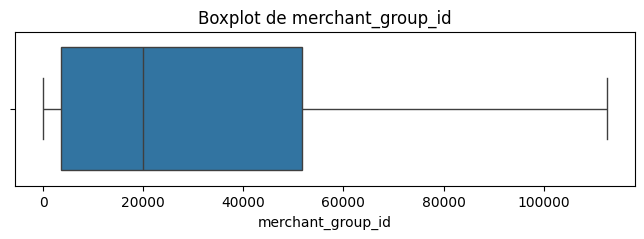

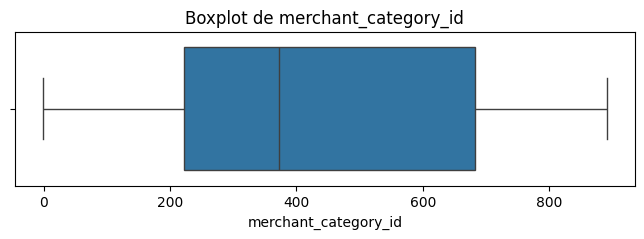

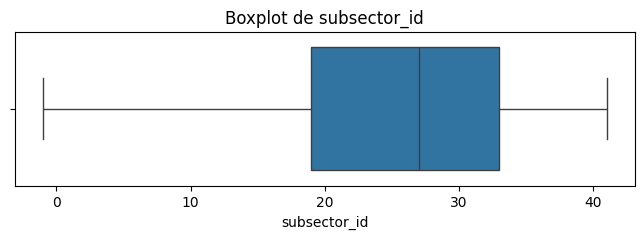

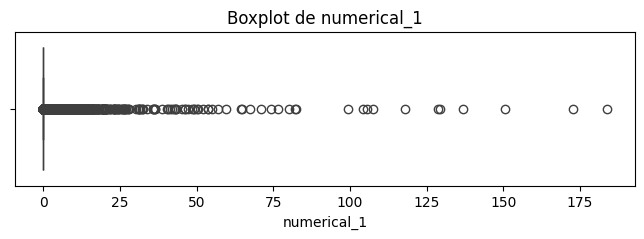

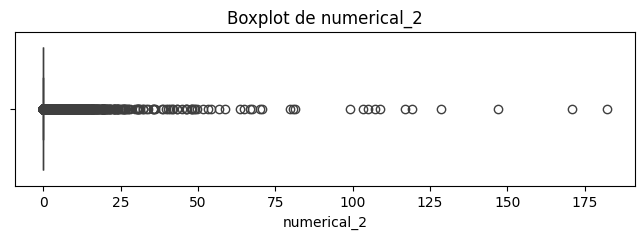

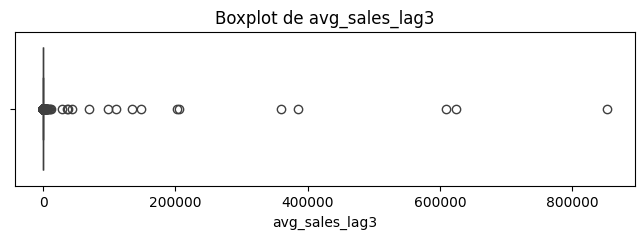

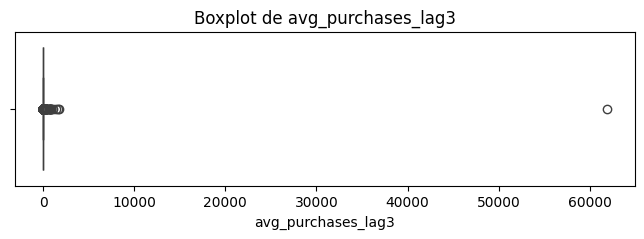

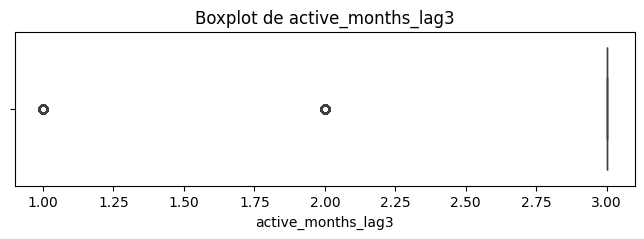

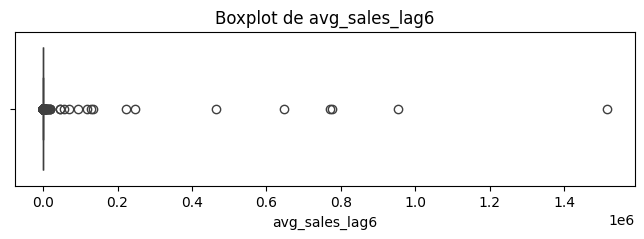

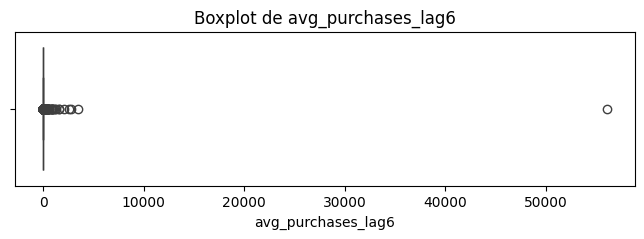

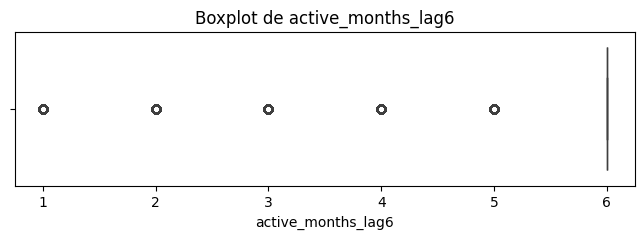

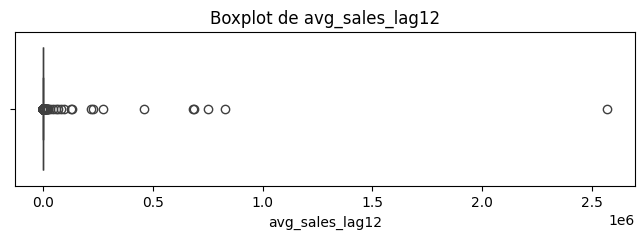

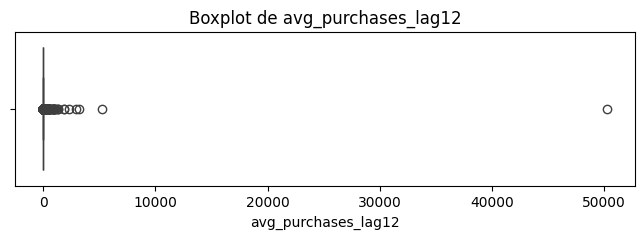

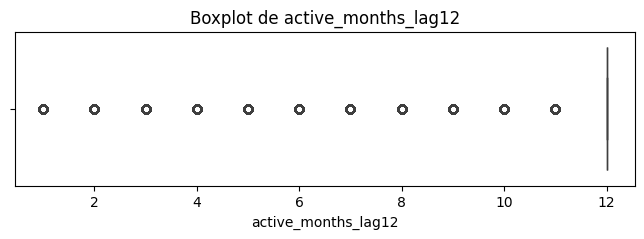

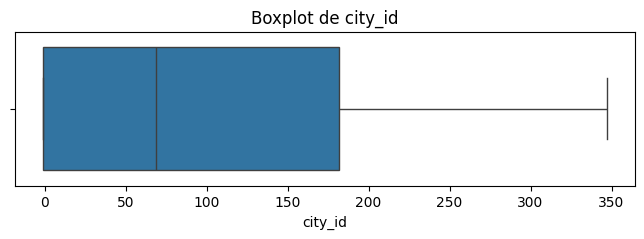

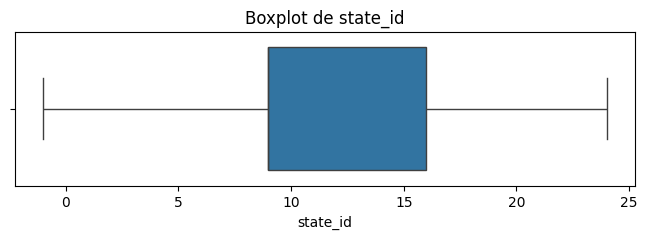

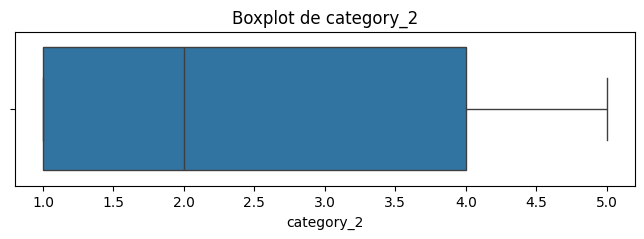

In [ ]:
# Análisis de filas duplicadas y valores atípicos en todas las columnas de merchants.csv

# 1. Duplicados de filas completas
duplicados_filas = vdf_merchants.duplicated().sum()
print(f"Número de filas completamente duplicadas: {duplicados_filas}")

# 2. Duplicados por columna
for col in vdf_merchants.columns:
    n_unicos = vdf_merchants[col].nunique()
    n_total = len(vdf_merchants[col])
    print(f"Columna '{col}': {n_total - n_unicos} valores repetidos ({n_unicos} únicos de {n_total})")

# 3. Outliers en columnas numéricas usando IQR
print("\nAnálisis de outliers:")
num_cols = vdf_merchants.select_dtypes(include=[np.number]).columns
for col in num_cols:
    Q1 = vdf_merchants[col].quantile(0.25)
    Q3 = vdf_merchants[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = ((vdf_merchants[col] < lower) | (vdf_merchants[col] > upper)).sum()
    print(f"Columna '{col}': {n_outliers} outliers (rango típico: {lower:.2f} a {upper:.2f})")

# 4. Boxplot para visualizar
for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=vdf_merchants[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

## Análisis de duplicados y valores atípicos de Nen Merchants Transactions

Número de filas completamente duplicadas: 0
Columna 'authorized_flag': 1963030 valores repetidos (1 únicos de 1963031)
Columna 'card_id': 1673030 valores repetidos (290001 únicos de 1963031)
Columna 'city_id': 1962723 valores repetidos (308 únicos de 1963031)
Columna 'category_1': 1963029 valores repetidos (2 únicos de 1963031)
Columna 'installments': 1963016 valores repetidos (15 únicos de 1963031)
Columna 'category_3': 1963028 valores repetidos (3 únicos de 1963031)
Columna 'merchant_category_id': 1962717 valores repetidos (314 únicos de 1963031)
Columna 'merchant_id': 1736902 valores repetidos (226129 únicos de 1963031)
Columna 'month_lag': 1963029 valores repetidos (2 únicos de 1963031)
Columna 'purchase_amount': 1887841 valores repetidos (75190 únicos de 1963031)
Columna 'purchase_date': 296006 valores repetidos (1667025 únicos de 1963031)
Columna 'category_2': 1963026 valores repetidos (5 únicos de 1963031)
Columna 'state_id': 1963006 valores repetidos (25 únicos de 1963031)
Colu

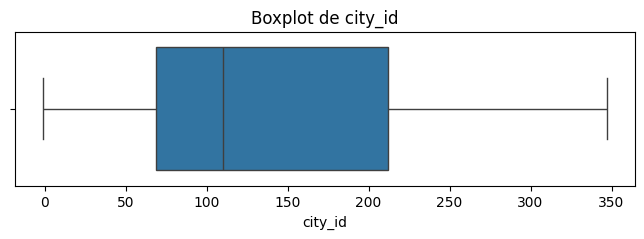

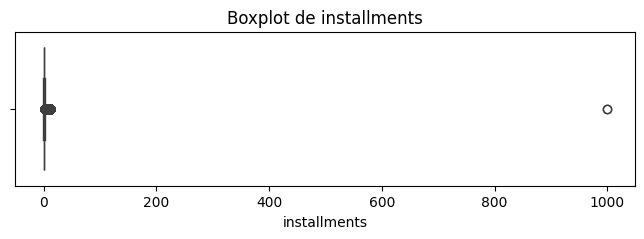

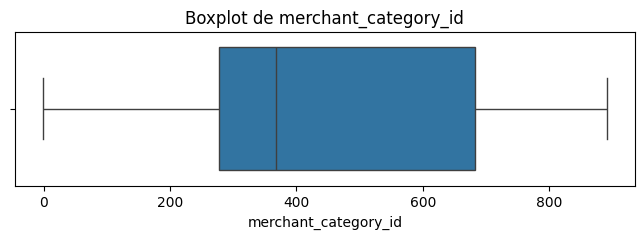

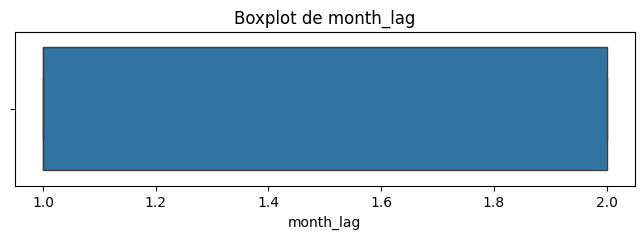

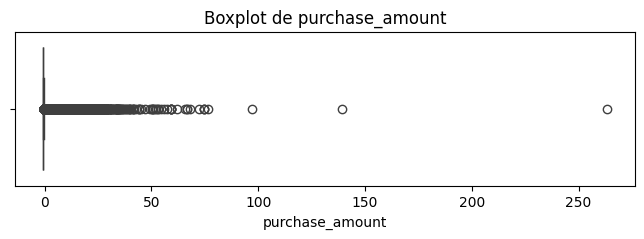

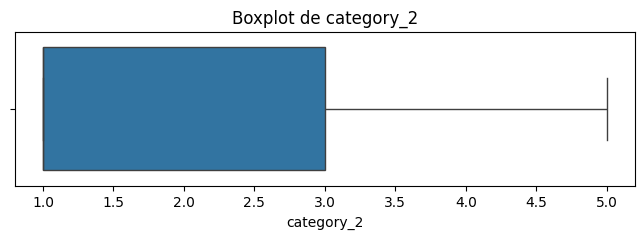

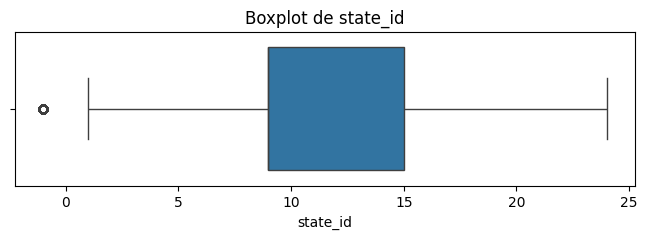

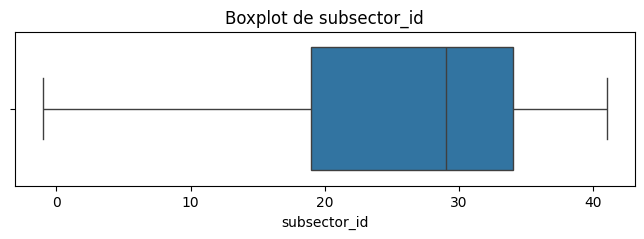

In [ ]:
# Análisis de filas duplicadas y valores atípicos en todas las columnas de new_merchant_transactions.csv

# 1. Duplicados de filas completas
duplicados_filas = vdf_new_trans.duplicated().sum()
print(f"Número de filas completamente duplicadas: {duplicados_filas}")

# 2. Duplicados por columna
for col in vdf_new_trans.columns:
    n_unicos = vdf_new_trans[col].nunique()
    n_total = len(vdf_new_trans[col])
    print(f"Columna '{col}': {n_total - n_unicos} valores repetidos ({n_unicos} únicos de {n_total})")

# 3. Outliers en columnas numéricas usando IQR
print("\nAnálisis de outliers:")

num_cols = vdf_new_trans.select_dtypes(include=[np.number]).columns
for col in num_cols:
    Q1 = vdf_new_trans[col].quantile(0.25)
    Q3 = vdf_new_trans[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = ((vdf_new_trans[col] < lower) | (vdf_new_trans[col] > upper)).sum()
    print(f"Columna '{col}': {n_outliers} outliers (rango típico: {lower:.2f} a {upper:.2f})")

# Boxplot para visualizar
for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=vdf_new_trans[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

## Análisis de duplicados y valores atípicos de Historical Transactions

In [ ]:
# Análisis de filas duplicadas y valores atípicos en todas las columnas de historical_transactions.csv

# 1. Duplicados de filas completas
duplicados_filas = vdf_hist_trans.duplicated().sum()
print(f"Número de filas completamente duplicadas: {duplicados_filas}")

# 2. Duplicados por columna
for col in vdf_hist_trans.columns:
    n_unicos = vdf_hist_trans[col].nunique()
    n_total = len(vdf_hist_trans[col])
    print(f"Columna '{col}': {n_total - n_unicos} valores repetidos ({n_unicos} únicos de {n_total})")

# 3. Outliers en columnas numéricas usando IQR
print("\nAnálisis de outliers:")

num_cols = vdf_hist_trans.select_dtypes(include=[np.number]).columns
for col in num_cols:
    Q1 = vdf_hist_trans[col].quantile(0.25)
    Q3 = vdf_hist_trans[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = ((vdf_hist_trans[col] < lower) | (vdf_hist_trans[col] > upper)).sum()
    print(f"Columna '{col}': {n_outliers} outliers (rango típico: {lower:.2f} a {upper:.2f})")

# Boxplot para visualizar
for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=vdf_hist_trans[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

## Errores de codificación, columnas irrelevantes, formatos incorrectos.

## Train

In [ ]:
# 1. Detección de errores de codificación (caracteres extraños)
for col in vdf_train.select_dtypes(include=['object']).columns:
    muestras = vdf_train[col].dropna().astype(str).sample(10, random_state=1)
    for val in muestras:
        try:
            val.encode('utf-8').decode('utf-8')
        except UnicodeDecodeError:
            print(f"Error de codificación en columna '{col}': {val}")

# 2. Columnas irrelevantes (por ejemplo, columnas con un solo valor o sin variabilidad)
columnas_irrelevantes = []
for col in vdf_train.columns:
    if vdf_train[col].nunique() <= 1:
        columnas_irrelevantes.append(col)
if columnas_irrelevantes:
    print("Columnas irrelevantes (sin variabilidad):", columnas_irrelevantes)
else:
    print("No se detectaron columnas irrelevantes por baja variabilidad.")

# 3. Formatos incorrectos (ejemplo: fechas mal formateadas)
if 'first_active_month' in vdf_train.columns:
    try:
        pd.to_datetime(vdf_train['first_active_month'], format='%Y-%m')
        print("Columna 'first_active_month' tiene formato correcto.")
    except Exception as e:
        print("Formato incorrecto en 'first_active_month':", e)
else:
    print("No existe la columna 'first_active_month'.")

# 4. Detección de columnas numéricas con valores no numéricos
for col in vdf_train.select_dtypes(include=['object']).columns:
    try:
        pd.to_numeric(vdf_train[col])
    except Exception:
        continue  # Si falla, es porque la columna no es numérica, lo cual puede ser esperado

# 5. Detección de columnas con nombres sospechosos (espacios, caracteres raros)
for col in vdf_train.columns:
    if ' ' in col or not col.isidentifier():
        print(f"Nombre de columna sospechoso: '{col}'")

No se detectaron columnas irrelevantes por baja variabilidad.
Columna 'first_active_month' tiene formato correcto.


## Merchants

In [ ]:
# 1. Detección de errores de codificación (caracteres extraños)
for col in vdf_merchants.select_dtypes(include=['object']).columns:
    muestras = vdf_merchants[col].dropna().astype(str).sample(10, random_state=1)
    for val in muestras:
        try:
            val.encode('utf-8').decode('utf-8')
        except UnicodeDecodeError:
            print(f"Error de codificación en columna '{col}': {val}")

# 2. Columnas irrelevantes (por ejemplo, columnas con un solo valor o sin variabilidad)
columnas_irrelevantes = []
for col in vdf_merchants.columns:
    if vdf_merchants[col].nunique() <= 1:
        columnas_irrelevantes.append(col)
if columnas_irrelevantes:
    print("Columnas irrelevantes (sin variabilidad):", columnas_irrelevantes)
else:
    print("No se detectaron columnas irrelevantes por baja variabilidad.")

# 3. Formatos incorrectos (ejemplo: fechas mal formateadas)
if 'first_active_month' in vdf_merchants.columns:
    try:
        pd.to_datetime(vdf_merchants['first_active_month'], format='%Y-%m')
        print("Columna 'first_active_month' tiene formato correcto.")
    except Exception as e:
        print("Formato incorrecto en 'first_active_month':", e)
else:
    print("No existe la columna 'first_active_month'.")

# 4. Detección de columnas numéricas con valores no numéricos
for col in vdf_merchants.select_dtypes(include=['object']).columns:
    try:
        pd.to_numeric(vdf_merchants[col])
    except Exception:
        continue  # Si falla, es porque la columna no es numérica, lo cual puede ser esperado

# 5. Detección de columnas con nombres sospechosos (espacios, caracteres raros)
for col in vdf_merchants.columns:
    if ' ' in col or not col.isidentifier():
        print(f"Nombre de columna sospechoso: '{col}'")

No se detectaron columnas irrelevantes por baja variabilidad.
No existe la columna 'first_active_month'.


## New Merchant Transactions

In [ ]:
# 1. Detección de errores de codificación (caracteres extraños)
for col in vdf_new_trans.select_dtypes(include=['object']).columns:
    muestras = vdf_new_trans[col].dropna().astype(str).sample(10, random_state=1)
    for val in muestras:
        try:
            val.encode('utf-8').decode('utf-8')
        except UnicodeDecodeError:
            print(f"Error de codificación en columna '{col}': {val}")

# 2. Columnas irrelevantes (por ejemplo, columnas con un solo valor o sin variabilidad)
columnas_irrelevantes = []
for col in vdf_new_trans.columns:
    if vdf_new_trans[col].nunique() <= 1:
        columnas_irrelevantes.append(col)
if columnas_irrelevantes:
    print("Columnas irrelevantes (sin variabilidad):", columnas_irrelevantes)
else:
    print("No se detectaron columnas irrelevantes por baja variabilidad.")

# 3. Formatos incorrectos (ejemplo: fechas mal formateadas)
if 'purchase_date' in vdf_new_trans.columns:
    try:
        pd.to_datetime(vdf_new_trans['purchase_date'])
        print("Columna 'purchase_date' tiene formato de fecha correcto.")
    except Exception as e:
        print("Formato incorrecto en 'purchase_date':", e)
else:
    print("No existe la columna 'purchase_date'.")

# 4. Detección de columnas numéricas con valores no numéricos
for col in vdf_new_trans.select_dtypes(include=['object']).columns:
    try:
        pd.to_numeric(vdf_new_trans[col])
    except Exception:
        continue  # Si falla, es porque la columna no es numérica, lo cual puede ser esperado

# 5. Detección de columnas con nombres sospechosos (espacios, caracteres raros)
for col in vdf_new_trans.columns:
    if ' ' in col or not col.isidentifier():
        print(f"Nombre de columna sospechoso: '{col}'")

Columnas irrelevantes (sin variabilidad): ['authorized_flag']
Columna 'purchase_date' tiene formato de fecha correcto.


## Historical Transactions

In [ ]:
# 1. Detección de errores de codificación (caracteres extraños)
for col in vdf_hist_trans.select_dtypes(include=['object']).columns:
    muestras = vdf_hist_trans[col].dropna().astype(str).sample(10, random_state=1)
    for val in muestras:
        try:
            val.encode('utf-8').decode('utf-8')
        except UnicodeDecodeError:
            print(f"Error de codificación en columna '{col}': {val}")

# 2. Columnas irrelevantes (por ejemplo, columnas con un solo valor o sin variabilidad)
columnas_irrelevantes = []
for col in vdf_hist_trans.columns:
    if vdf_hist_trans[col].nunique() <= 1:
        columnas_irrelevantes.append(col)
if columnas_irrelevantes:
    print("Columnas irrelevantes (sin variabilidad):", columnas_irrelevantes)
else:
    print("No se detectaron columnas irrelevantes por baja variabilidad.")

# 3. Formatos incorrectos (ejemplo: fechas mal formateadas)
if 'purchase_date' in vdf_hist_trans.columns:
    try:
        pd.to_datetime(vdf_hist_trans['purchase_date'])
        print("Columna 'purchase_date' tiene formato de fecha correcto.")
    except Exception as e:
        print("Formato incorrecto en 'purchase_date':", e)
else:
    print("No existe la columna 'purchase_date'.")

# 4. Detección de columnas numéricas con valores no numéricos
for col in vdf_hist_trans.select_dtypes(include=['object']).columns:
    try:
        pd.to_numeric(vdf_hist_trans[col])
    except Exception:
        continue  # Si falla, es porque la columna no es numérica, lo cual puede ser esperado

# 5. Detección de columnas con nombres sospechosos (espacios, caracteres raros)
for col in vdf_hist_trans.columns:
    if ' ' in col or not col.isidentifier():
        print(f"Nombre de columna sospechoso: '{col}'")

No se detectaron columnas irrelevantes por baja variabilidad.
Columna 'purchase_date' tiene formato de fecha correcto.


In [ ]:
# Posibles inconsistencias entre archivos (ej.: merchant_ids que no existen).

In [ ]:
import pandas as pd

# Cargar los datasets necesarios
df_hist = pd.read_csv('src/historical_transactions.csv')
df_new = pd.read_csv('src/new_merchant_transactions.csv')
df_merchants = pd.read_csv('src/merchants.csv')

# Validar merchant_id de historical_transactions
merchant_ids_hist = set(df_hist['merchant_id'].unique())
merchant_ids_merchants = set(df_merchants['merchant_id'].unique())
merchant_ids_hist_no_encontrados = merchant_ids_hist - merchant_ids_merchants

print(f"merchant_id de historical_transactions.csv NO encontrados en merchants.csv: {len(merchant_ids_hist_no_encontrados)}")
if merchant_ids_hist_no_encontrados:
    print(list(merchant_ids_hist_no_encontrados))  # Muestra los primeros 10

# Validar merchant_id de new_merchant_transactions
merchant_ids_new = set(df_new['merchant_id'].unique())
merchant_ids_new_no_encontrados = merchant_ids_new - merchant_ids_merchants

print(f"merchant_id de new_merchant_transactions.csv NO encontrados en merchants.csv: {len(merchant_ids_new_no_encontrados)}")
if merchant_ids_new_no_encontrados:
    print(list(merchant_ids_new_no_encontrados))  # Muestra los primeros 10

merchant_id de historical_transactions.csv NO encontrados en merchants.csv: 1
{nan}
[nan]
merchant_id de new_merchant_transactions.csv NO encontrados en merchants.csv: 1
[nan]


# 8.Análisis de Relaciones entre Tablas

In [ ]:
# ¿Cómo se relacionan las tablas? (train/test con transacciones y merchants).

| Tabla                       | Relaciona con...                | Clave de unión | Tipo de relación  |
| --------------------------- | ------------------------------- | -------------- | ----------------- |
| `train.csv` / `test.csv`    | `historical_transactions.csv`   | `card_id`      | 1 a muchos (1\:N) |
| `train.csv` / `test.csv`    | `new_merchant_transactions.csv` | `card_id`      | 1 a muchos (1\:N) |
| `historical_transactions`   | `merchants.csv`                 | `merchant_id`  | muchos a 1 (N:1)  |
| `new_merchant_transactions` | `merchants.csv`                 | `merchant_id`  | muchos a 1 (N:1)  |


1. train.csv / test.csv
Clave primaria: card_id

Relaciona con: transacciones históricas y nuevas

2. historical_transactions y new_merchant_transactions
Clave foránea: card_id → viene de train/test

Clave foránea: merchant_id → apunta a merchants

3. merchants.csv
Clave primaria: merchant_id

No tiene referencias a card_id directamente, es solo receptor

In [ ]:
# Análisis de cardinalidad y potenciales problemas de duplicación.

| Relación                   | Cardinalidad                | Posibles problemas                                            |
| -------------------------- | --------------------------- | ------------------------------------------------------------- |
| `train` ↔ `historical`     | 1 a muchos                  | Duplicación de `train` al hacer `merge` directo               |
| `train` ↔ `merchants`      | Indirecta vía transacciones | Cuidado si se hace doble join con merchants desde dos fuentes |
| `historical` ↔ `merchants` | muchos a 1                  | Seguro: no hay duplicación                                    |



1. Relación entre train/test y historical_transactions

La relación entre estas tablas es de uno a muchos (1:N), unidas a través del campo card_id. Esto significa que cada entrada en train o test puede estar asociada con decenas o incluso cientos de transacciones históricas.

Un merge directo utilizando card_id como clave puede inflar el número de filas del dataset, ya que replicará la información de train tantas veces como transacciones tenga cada tarjeta. Por ejemplo, si un card_id presenta 200 transacciones, la fila correspondiente de train se repetirá 200 veces.

Recomendación: Antes de realizar la unión, es necesario aplicar funciones de agregación sobre las transacciones agrupadas por card_id (por ejemplo: sumatorias, promedios, conteos, últimas fechas, entre otras), y luego realizar el merge.

2. Relación entre train/test y new_merchant_transactions

Esta relación también es de uno a muchos (1:N) por card_id, de manera análoga al caso anterior. Aunque el volumen de datos en new_merchant_transactions suele ser menor que en historical_transactions, la problemática es similar.

Recomendación: Se recomienda aplicar agregaciones por card_id antes de realizar la unión con train o test, para evitar la duplicación masiva de datos.

3. Relación entre historical_transactions y merchants

Esta relación es de muchos a uno (N:1), a través de la clave merchant_id. Es decir, múltiples transacciones pueden estar asociadas a un único comercio.

La unión no genera duplicación de registros, ya que cada transacción apunta a un único comercio. Sin embargo, es importante tener en cuenta que algunos valores de merchant_id pueden ser nulos o inválidos, por lo que un inner join podría provocar la pérdida de información.

Recomendación: Se recomienda utilizar un left join desde historical_transactions hacia merchants para preservar todos los registros de transacciones, aún si no tienen comercio asociado.

4. Relación entre new_merchant_transactions y merchants

Este caso es análogo al anterior: una relación de muchos a uno (N:1) por merchant_id, con el mismo volumen de datos aproximado.

Recomendación: Al igual que con historical_transactions, se sugiere aplicar un left join desde new_merchant_transactions hacia merchants para mantener la integridad de las transacciones.

5. Consideraciones sobre uniones múltiples con merchants

Si se realiza la unión de la tabla merchants tanto con historical_transactions como con new_merchant_transactions, existe el riesgo de redundancia de columnas como merchant_category_id, subsector_id, entre otras, que podrían aparecer duplicadas y generar ambigüedad.

Recomendación: En estos casos, se debe renombrar las columnas provenientes de merchants con prefijos diferenciados (por ejemplo: hist_merchant_* y new_merchant_*) para evitar conflictos en el dataset final y asegurar la trazabilidad de los datos.



# 9.HIPOTESIS PRELIMINARES



**H01: La antigüedad de la tarjeta está positivamente relacionada con el score de lealtad.**

**H02: El gasto total y la frecuencia de compras en nuevos comercios pueden influir en el score de lealtad.**

**H03: El comportamiento histórico de compra (monto, frecuencia, cuotas) es un predictor relevante del score de lealtad.**

**H04: Las variables categóricas internas (feature_1, feature_2, feature_3) tienen baja correlación lineal con el score.**

**H05: La calidad de los datos (valores nulos, duplicados, inconsistencias en claves) puede afectar la capacidad predictiva del modelo si no se trata adecuadamente.**

# 10.Conclusiones y Próximos Pasos
### Conclusiones de la Fase de Comprensión de los Datos
Durante la fase de comprensión de los datos se analizó la estructura, calidad y valor informativo de los conjuntos de datos proporcionados por Elo. A partir del análisis exploratorio, se destaca lo siguiente:

- Los datos de clientes, transacciones históricas y recientes, junto con la información de los comercios, proporcionan una visión integral del comportamiento de compra.

- La variable objetivo (target) muestra una distribución asimétrica y presencia de outliers, lo cual deberá ser tratado cuidadosamente en el modelado.

- Existen variables con valores nulos y categorías poco frecuentes que requieren limpieza y tratamiento especial.

- Algunas variables individuales tienen baja correlación lineal con el score de lealtad, por lo que la creación de características agregadas y combinadas será clave para mejorar la capacidad predictiva del modelo.

Con base en el análisis realizado, se identifican las siguientes variables como candidatas clave para el modelado predictivo del score de lealtad:

Del archivo train.csv:

- card_id: Identificador único del cliente (clave principal para unión).

- first_active_month: Potencial para calcular la antigüedad del cliente.

- feature_1, feature_2, feature_3: Variables categóricas internas de Elo que parecen tener relación con comportamiento de compra.

Del archivo historical_transactions.csv:

- purchase_amount: Relevante para caracterizar el gasto histórico del cliente.

- installments: Puede indicar el tipo de compra (contado vs crédito).

- purchase_date: Útil para calcular frecuencia, antigüedad y estacionalidad.

- month_lag: Permite análisis temporal de comportamiento.

- authorized_flag: Indica si la transacción fue efectiva.

- category_1, category_2, category_3: Atributos categóricos de la compra.

- merchant_id, merchant_category_id: Potencial para análisis por tipo de comercio.

Del archivo new_merchant_transactions.csv:

- Variables similares a historical_transactions, pero enfocadas en el comportamiento reciente del cliente con nuevos comercios.

Del archivo merchants.csv:

- merchant_group_id, avg_sales_lag*, avg_purchases_lag*: Indicadores de comportamiento agregado del comercio.

- category_1, most_recent_sales_range, most_recent_purchases_range: Información contextual del comercio.

Estas variables deben ser transformadas o agregadas por cliente (card_id) para que puedan ser utilizadas en un modelo supervisado.

En base a los hallazgos y el tipo de problema (regresión supervisada), se recomiendan los siguientes pasos para la fase de Preparación de los Datos:

1. Limpieza y tratamiento de valores nulos

    - Imputar valores faltantes en category_2, category_3, installments, y variables derivadas de merchants.csv.

    - Eliminar o agrupar categorías con baja frecuencia.

2. Conversión de variables temporales

    - Calcular antigüedad del cliente desde first_active_month.

    - Extraer atributos temporales (mes, día, estacionalidad) de las fechas de transacciones.

3. Agregaciones por cliente

    - Agrupar transacciones históricas y nuevas por card_id y calcular:

      - Total y promedio gastado.

      - Número de transacciones.

      - Frecuencia de compras.

      - Porcentaje de transacciones autorizadas.

      - Comportamiento por categoría.

4. Codificación de variables categóricas

    - Aplicar codificación (por ejemplo, label encoding o one-hot encoding) a variables como feature_1-3, category_1-3, state_id, city_id, etc.

5. Fusión de datos

    - Integrar las tablas historical_transactions, new_merchant_transactions y merchants al dataset base (train.csv) mediante card_id y merchant_id.

6. Tratamiento de outliers

    - Identificar y tratar valores extremos en variables como purchase_amount y en el target (target) si se considera.

7. Preparación final para modelado

    - Selección de variables finales.

    - División en conjuntos de entrenamiento, validación y prueba.

    - Generación de modelos base (baseline) como regresión lineal simple o predicción por media para establecer punto de comparación.